In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import keras

2024-06-09 16:55:25.185321: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-09 16:55:25.218293: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 16:55:25.886777: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
tf.__version__, keras.__version__

('2.16.1', '3.3.3')

In [4]:
# This is required to download Gemma model
# import kagglehub
# kagglehub.login()

# Build model

In [5]:
from keras_llm_light.models import gemma

LORA_RANK = 4
LORA_APLHA = 32.0
MAX_SEQ_LENGTH = 512

optimizer = keras.optimizers.Adam(learning_rate=0.0001)

trainer, llm = gemma.build_gemma_llm(
    lora_rank=LORA_RANK,
    lora_alpha=LORA_APLHA,
    max_sequence_len=MAX_SEQ_LENGTH,
    optimizer=optimizer,
)

2024-06-09 16:55:27.834099: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-09 16:55:27.860894: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-09 16:55:27.861060: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Building Gemma 2B model on CPU ...


normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,506,172,416 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,506,172,416 (9.34 GB)

 Trainable params: 2,506,172,416 (9.34 GB)

 Non-trainable params: 0 (0.00 B)

2024-06-09 16:55:40.114445: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


Single block trainable weights:
- decoder_block/attention/query/lora_A/kernel [2048, 4]
- decoder_block/attention/query/lora_B/kernel [8, 4, 256]
- decoder_block/attention/value/lora_A/kernel [2048, 4]
- decoder_block/attention/value/lora_B/kernel [1, 4, 256]


Preparing/Quantizing weights: 100%|██████████| 18/18 [00:33<00:00,  1.86s/it]


                                        Block Memory Usage (Num blocks 18)                                         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃                                                 ┃             ┃         ┃   Mem Usage ┃    FP32 Mem ┃           ┃
┃                                          Tensor ┃       Shape ┃   dtype ┃        [MB] ┃  Usage [MB] ┃ Trainable ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│          decoder_block/pre_attention_norm/scale │      [2048] │ float16 │       0.004 │       0.008 │     False │
│            decoder_block/attention/query/kernel │   [8, 2048, │ float16 │       8.000 │      16.000 │     False │
│                                                 │        256] │         │             │             │           │
│              decoder_block/attention/key/kernel │   [1, 2048, │ float16 │       1.000 │       2.000 │     False │
│                                                 │        256] │         │             │             │           │
│            decoder_block/attention/value/kernel │   [1, 2048, │ float16 │       1.000 │       2.000 │     False │
│                                                 │        256] │         │             │             │           │
│ decoder_block/attention/attention_output/kernel │    [8, 256, │ float16 │       8.000 │      16.000 │     False │
│                                                 │       2048] │         │             │             │           │
│     decoder_block/attention/query/lora_A/kernel │   [2048, 4] │ float32 │       0.031 │       0.031 │      True │
│     decoder_block/attention/query/lora_B/kernel │ [8, 4, 256] │ float32 │       0.031 │       0.031 │      True │
│     decoder_block/attention/value/lora_A/kernel │   [2048, 4] │ float32 │       0.031 │       0.031 │      True │
│     decoder_block/attention/value/lora_B/kernel │ [1, 4, 256] │ float32 │       0.004 │       0.004 │      True │
│                decoder_block/pre_ffw_norm/scale │      [2048] │   uint8 │       0.002 │       0.008 │     False │
│                 decoder_block/ffw_gating/kernel │      [2048, │   uint8 │      33.130 │     128.000 │     False │
│                                                 │      16384] │         │             │             │           │
│               decoder_block/ffw_gating_2/kernel │      [2048, │   uint8 │      33.131 │     128.000 │     False │
│                                                 │      16384] │         │             │             │           │
│                 decoder_block/ffw_linear/kernel │     [16384, │   uint8 │      33.138 │     128.000 │     False │
│                                                 │       2048] │         │             │             │           │
└─────────────────────────────────────────────────┴─────────────┴─────────┴─────────────┴─────────────┴───────────┘

# Train model

In [6]:
ds = tfds.load("imdb_reviews", split="train")

for document in ds:
    break

document

2024-06-09 16:56:17.146952: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


{'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 'text': <tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">}

In [7]:
SEPARATOR  = "Sentiment: "
LABEL_TO_SENTIMENT = tf.constant(["Negative", "Positive"])

def prepare_text(document):
    text = document['text']
    sentiment = LABEL_TO_SENTIMENT[document['label']]
    return text + f"\n{SEPARATOR}" + sentiment

In [8]:
BATCH_SIZE = 1

train_ds = (
    ds.map(prepare_text)
    .repeat(-1)
    .shuffle(2000)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [9]:
train_ds_processed = train_ds.map(llm.preprocessor)
train_ds_processed_iter = iter(train_ds_processed)

In [10]:
for sample in train_ds:
    break

parts = sample[0].numpy().decode("utf-8").split(SEPARATOR)
query = parts[0] + SEPARATOR
print(query)
print(parts[1])

Every Sunday, a trio of buds get together at a NYC diner to boast about their sexual conquests of the night before. Sometimes they're joined by a newlywed ex-comrade and hoochie hunter who hangs on them like a puling barnacle. They're unabashed horn dogs/corn dogs and Mia, who witnesses them on the prowl, decides that they need to be taught a lesson, dammit. Ergo, she'll date and dump - why not? All three of them! <br /><br />Gasp. What a wild idea. What a radical, naughty gal. Women now have the right to date and sleep around as much as they want to. As much as men do, even! <br /><br />There is one solitary laughable element in "Whipped" - namely the fact that not once, during the amigo's detailed discussions of their bodily functions and the tantric talents of the bed partners they trash, do the other customers in the diner turn around and say, "Dude, we're trying to EAT here." Indeed, a heh-heh gag has an older lady eagerly weigh in on the useful sexual properties of certain bevera

2024-06-09 16:56:17.595487: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [11]:
response_text = llm.generate(query, max_length=MAX_SEQ_LENGTH)
print(query + response_text.numpy().decode("utf-8"))

Generating text:   0%|          | 0/512 [00:00<?, ?it/s]

Tracing assign_block_weights


I0000 00:00:1717944978.170949   91880 service.cc:145] XLA service 0x29b02290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717944978.170972   91880 service.cc:153]   StreamExecutor device (0): NVIDIA RTX A4000 Laptop GPU, Compute Capability 8.6
2024-06-09 16:56:18.182332: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8905
I0000 00:00:1717944978.266730   91880 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Tracing block_forward


2024-06-09 16:56:18.407171: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1717944979.443108   92443 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_7', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1717944980.137808   92447 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1717944980.801797   92439 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_8', 24 bytes spill stores, 24 bytes spill loads



Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights


Tracing assign_block_weights


Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights
Tracing assign_block_weights


Generating text: 100%|█████████▉| 511/512 [00:29<00:00, 17.15it/s]

Every Sunday, a trio of buds get together at a NYC diner to boast about their sexual conquests of the night before. Sometimes they're joined by a newlywed ex-comrade and hoochie hunter who hangs on them like a puling barnacle. They're unabashed horn dogs/corn dogs and Mia, who witnesses them on the prowl, decides that they need to be taught a lesson, dammit. Ergo, she'll date and dump - why not? All three of them! <br /><br />Gasp. What a wild idea. What a radical, naughty gal. Women now have the right to date and sleep around as much as they want to. As much as men do, even! <br /><br />There is one solitary laughable element in "Whipped" - namely the fact that not once, during the amigo's detailed discussions of their bodily functions and the tantric talents of the bed partners they trash, do the other customers in the diner turn around and say, "Dude, we're trying to EAT here." Indeed, a heh-heh gag has an older lady eagerly weigh in on the useful sexual properties of certain bevera

In [12]:
metrics = trainer.fit(llm, train_ds_processed, epochs=1, steps_per_epoch=2000)

1321it [09:08,  2.10it/s]

0 1320 1.1018922 0.2178302


1331it [09:12,  2.04it/s]

0 1330 0.9804423 0.2176463


1341it [09:17,  2.11it/s]

0 1340 1.753069 0.21806315


1351it [09:22,  2.09it/s]

0 1350 0.7081214 0.21822947


1361it [09:27,  2.09it/s]

0 1360 2.3553946 0.21842992


1371it [09:31,  2.08it/s]

0 1370 2.4506693 0.21871509


1381it [09:36,  2.11it/s]

0 1380 2.6113372 0.21896218


1391it [09:41,  2.13it/s]

0 1390 1.8060169 0.2188778


1401it [09:46,  2.11it/s]

0 1400 1.119721 0.21857572


1411it [09:50,  2.08it/s]

0 1410 1.1395746 0.2185465


1421it [09:55,  2.08it/s]

0 1420 1.1850827 0.218772


1431it [10:00,  2.13it/s]

0 1430 2.1346867 0.21892336


1441it [10:05,  2.14it/s]

0 1440 1.7871951 0.21890184


1451it [10:10,  2.09it/s]

0 1450 3.0114393 0.21881597


1461it [10:14,  2.05it/s]

0 1460 1.5781641 0.21882087


1471it [10:19,  2.10it/s]

0 1470 1.9934244 0.21902224


1481it [10:24,  2.14it/s]

0 1480 2.0115695 0.21869065


1491it [10:29,  2.15it/s]

0 1490 2.6621306 0.21899696


1501it [10:33,  2.14it/s]

0 1500 1.1542345 0.21890098


1511it [10:38,  2.11it/s]

0 1510 3.0048428 0.21915077


1521it [10:43,  2.10it/s]

0 1520 2.6764784 0.2191231


1531it [10:47,  2.11it/s]

0 1530 0.9458314 0.21908174


1541it [10:52,  2.15it/s]

0 1540 0.9133131 0.2187145


1551it [10:57,  2.12it/s]

0 1550 2.5780973 0.21930416


1561it [11:02,  2.11it/s]

0 1560 1.8409793 0.21926433


1571it [11:06,  2.10it/s]

0 1570 1.4521037 0.21914169


1581it [11:11,  2.12it/s]

0 1580 1.4377015 0.21968904


1591it [11:16,  2.09it/s]

0 1590 2.0844917 0.2195579


1601it [11:20,  2.18it/s]

0 1600 3.196047 0.21966875


1611it [11:25,  2.16it/s]

0 1610 1.5418758 0.21948542


1621it [11:30,  2.13it/s]

0 1620 1.1616918 0.21945739


1631it [11:34,  2.24it/s]

0 1630 1.0373461 0.21938477


1641it [11:39,  2.24it/s]

0 1640 0.7644794 0.21931544


1651it [11:43,  2.21it/s]

0 1650 1.0772117 0.21941732


1661it [11:48,  2.25it/s]

0 1660 1.0950825 0.21979317


1671it [11:52,  2.13it/s]

0 1670 0.50556403 0.21944088


1681it [11:57,  2.08it/s]

0 1680 1.4318831 0.21918693


1691it [12:02,  2.18it/s]

0 1690 3.285428 0.21902493


1701it [12:06,  2.23it/s]

0 1700 2.5790572 0.21895383


1711it [12:11,  2.30it/s]

0 1710 0.9659467 0.21899089


1721it [12:15,  2.29it/s]

0 1720 1.112963 0.21904853


1731it [12:19,  2.24it/s]

0 1730 1.5794291 0.21898136


1741it [12:24,  2.21it/s]

0 1740 1.2265005 0.21863219


1751it [12:28,  2.34it/s]

0 1750 2.7842526 0.21881413


1761it [12:32,  2.38it/s]

0 1760 0.3428393 0.21874002


1771it [12:37,  2.29it/s]

0 1770 2.0945177 0.21856526


1781it [12:41,  2.18it/s]

0 1780 0.83213127 0.21887504


1791it [12:46,  2.24it/s]

0 1790 1.3730164 0.21899867


1801it [12:50,  2.24it/s]

0 1800 1.5594542 0.21897236


1811it [12:55,  2.25it/s]

0 1810 1.6858964 0.21864538


1821it [12:59,  2.23it/s]

0 1820 1.354696 0.21873283


1831it [13:04,  2.28it/s]

0 1830 1.8750117 0.21858251


1841it [13:08,  2.25it/s]

0 1840 3.482183 0.21834892


1851it [13:12,  2.27it/s]

0 1850 1.1829743 0.21853894


1861it [13:17,  2.27it/s]

0 1860 2.3762245 0.21825981


1871it [13:21,  2.20it/s]

0 1870 1.9437608 0.21810897


1881it [13:26,  2.21it/s]

0 1880 3.356947 0.21827334


1891it [13:30,  2.22it/s]

0 1890 0.96271986 0.21828103


1901it [13:35,  2.23it/s]

0 1900 2.3056252 0.21861538


1911it [13:39,  2.26it/s]

0 1910 0.9130092 0.21854761


1921it [13:43,  2.28it/s]

0 1920 3.4147093 0.21850342


1931it [13:48,  2.31it/s]

0 1930 1.2302482 0.21858309


1941it [13:52,  2.34it/s]

0 1940 1.8720803 0.21866548


1951it [13:57,  2.34it/s]

0 1950 3.1462994 0.21890669


1961it [14:01,  2.30it/s]

0 1960 1.1965506 0.21871912


1971it [14:05,  2.21it/s]

0 1970 2.8613057 0.21880302


1981it [14:10,  2.27it/s]

0 1980 1.5135703 0.21875297


1991it [14:14,  2.31it/s]

0 1990 1.371501 0.21844095


2000it [14:18,  2.33it/s]

0 1.9085727 0.21840914



2024-06-09 17:11:06.011708: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


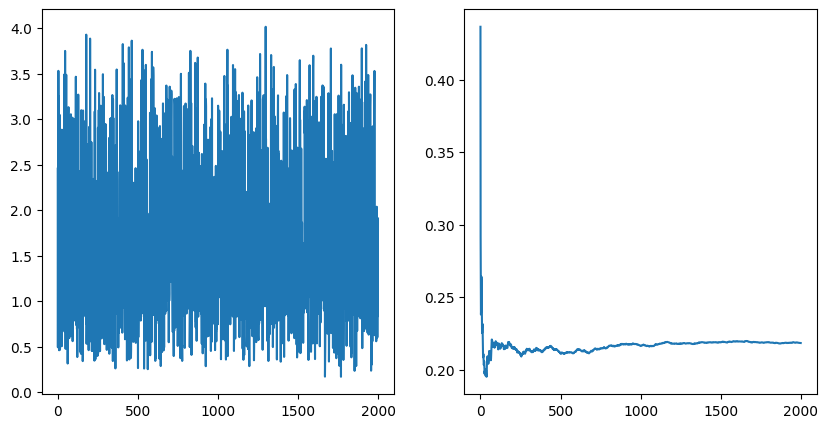

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(metrics_df["loss"], label="loss")
plt.subplot(122) 
plt.plot(metrics_df["accuracy"], label="accuracy")

# Evaluate model

In [14]:
test_ds = tfds.load("imdb_reviews", split="test")
test_ds = (
    test_ds.map(prepare_text)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)
test_ds_processed = test_ds.map(llm.preprocessor)
test_ds_iter = iter(test_ds)

In [15]:
for sample in test_ds_iter:
    break

parts = sample[0].numpy().decode("utf-8").split(SEPARATOR.strip())
query = parts[0] + SEPARATOR.strip()
print(query)
print(parts[1])

There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.
Sentiment:
 Positive


In [16]:
import pprint

response_text = llm.generate(query, max_length=MAX_SEQ_LENGTH)
pprint.pprint(query + response_text.numpy().decode("utf-8"))

Generating text:  47%|████▋     | 243/512 [00:00<00:00, 735.76it/s] 

('There are films that make careers. For George Romero, it was NIGHT OF THE '
 'LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add '
 "to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless "
 'film-making, and as assured and as professional as any of the aforementioned '
 "movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even "
 "then, I don't think I laughed quite this hard... So to speak.) Tukel's "
 'talent is considerable: DING-A-LING-LESS is so chock full of double '
 'entendres that one would have to sit down with a copy of this script and do '
 'a line-by-line examination of it to fully appreciate the, uh, breadth and '
 'width of it. Every shot is beautifully composed (a clear sign of a '
 "sure-handed director), and the performances all around are solid (there's "
 "none of the over-the-top scenery chewing one might've expected from a film "
 'like this). DING-A-LING-LESS is a film whose time has come.\n'
 'Senti

In [17]:
from tqdm import tqdm

y_true = []
y_pred = []
for i, sample in tqdm(enumerate(test_ds_iter)):
    parts = sample[0].numpy().decode("utf-8").split(SEPARATOR.strip())
    query = parts[0] + SEPARATOR.strip()

    response_text = llm.generate(query, max_length=MAX_SEQ_LENGTH, verbose=False)
    response_text = response_text.numpy().decode("utf-8")
    if len(response_text) > 0:
        y_true.append(parts[1])
        y_pred.append(response_text)

    if len(y_pred) >= 1000:
        break

1it [00:00,  2.94it/s]

Prompt is too long >512 (Max Length), prompt: Scary Movie 1-4, Epic Movie, Date Movie, Meet the Spartans, Not another Teen Movie and Another Gay Movie. Making "Superhero Movie" the eleventh in a series that single handily ruined the parody genre. Now I'll admit it I have a soft spot for classics such as Airplane and The Naked Gun but you know you've milked a franchise so bad when you can see the gags a mile off. In fact the only thing that might really temp you into going to see this disaster is the incredibly funny but massive sell-out Leslie Neilson.<br /><br />You can tell he needs the money, wither that or he intends to go down with the ship like a good Capitan would. In no way is he bringing down this genre but hell he's not helping it. But if I feel sorry for anybody in this film its decent actor Drake Bell who is put through an immense amount of embarrassment. The people who are put through the largest amount of torture by far however is the audience forced to sit through 90 min

8it [00:02,  3.12it/s]

Prompt is too long >512 (Max Length), prompt: Every great once in a while, you stumble upon a movie that exceeds even your wildest expectations. Given the IMDb rating of 4.0, I wasn't really expecting much with The Brotherhood of Satan. I hoped that at a minimum it might be cheesy fun like The Devil's Rain or any of the other early 70s similarly themed Satanic horror films. I couldn't' have been more wrong. What I got instead was an ambitious and intelligent film with a cast I really enjoyed. Speaking in broad terms to avoid giving anything away, the film's style and structure are much more experimental than the straightforward storytelling so prominent in the early 70s. The Brotherhood of Satan doesn't beat you over the head with plot points and explanations. A lot is left to the viewer to fill in the blanks. As a viewer, you know something is amiss, but for the longest period you're just not sure what it is. The unknown helps make for a far creepier atmosphere than most similar films

40it [00:12,  3.02it/s]

Prompt is too long >512 (Max Length), prompt: I have been collecting Iron Man comics since the early 70s and always enjoyed the character who is far far from the average clean cut hero and his many and varied enemies. There have been no less than three attempts at an animated series for Iron Man and only the original and part of the second have ever done the character justice. So I was somewhat hopeful that this newest version would be good. Boy was I wrong! The DVD art is VERY misleading and presents an image that is not the movie. Fist off the good, what little there is... The art and animation are well drawn and the writing and dialog are generally good, though with notable exceptions. Character voices are very well selected and each character is distinctive and well acted. Now for the bad... Unfortunately the writers opted to totally screw around with both Iron Man's origin and especially the Mandarin's. On top of that they decided to do Iron Man and his opponents all in CGI. Bad C

59it [00:18,  2.86it/s]

Prompt is too long >512 (Max Length), prompt: The title pretty much lets you know what you're getting. It's a grade-C howler but not as blatantly funny as I was hoping. Directed by exploitation film specialist Eddie Romero from a story that originally came from Jonathan Demme (long before directing "Silence of the Lambs" and "Philadelphia"), this low-budget 1972 action movie was obviously filmed in the Philippines but set in some anonymous third world country. Playing hooker and small-time drug dealer Lee Daniels, blaxploitation superstar Pam Grier plays the first half of the title role, while long-forgotten Margaret Markov is the other half, Karen Brent, an unlikely Patty Hearst-like political revolutionary looking to partner with her comrades to overthrow the oppressive local government. Naturally antagonistic toward each other, they are in a women's prison camp where they wear inexplicably bright yellow mini-skirts as uniforms. Run by a closeted warden and lecherous matron, the pris

63it [00:19,  3.18it/s]

Prompt is too long >512 (Max Length), prompt: Favela Rising is a documentary about the slums of Rio, the favelas, specifically the most violent one, Vigário Geral. According to this film, a lot more kids have died violently in Rio's favelas over the last decade or so than in Israel/Palestine during the same period -- a fact astonishing if true, which shows how under-recognized this social problem is in the rest of the world. This is an important topic, especially for those who see hope in grassroots efforts to marshal the neediest and most at risk through a vibrant cultural program. This is a compelling documentary, if occasionally marred by a somewhat too personality-based version of events and by grainy digital video and film that sometimes may make you think you need to have your eyes examined.<br /><br />Drug lords rule in the favelas and gun-toting teenage boys are the main drug dealers, like in parts of Colombia. Fernando Meirelles' movie City of God/Cidade de Deus has been accus

135it [00:45,  2.71it/s]

Prompt is too long >512 (Max Length), prompt: "The Duke" is a film based in the heart of the British aristocracy where an old Duke (John Neville) dies and to avoid his large property and the vast riches to be taken from him after death by 2 devious aristocrats (Oliver Muirhead and Sophie Heyman); he passes his Dukeship down to his dog. The dog's "best friend", an American girl named Charlotte (played by Courtnee Draper) whose parents die becomes orphaned by the former Duke due to him being her great uncle. A young chef named Florian arrives, with him and Charlotte instantly connecting creating a romantic sub-plot which in its own way, acts as the under tone for the main plot line being the activities of Hubert, The 'Duke' and his many activities and love interests with other dogs. All this is watched over by James Doohan who plays a Butler who is determined to try and serve his old Duke by doing his best to serve his new master, Hubert. Doohan acts as the older character there to comfo

139it [00:46,  3.77it/s]

Prompt is too long >512 (Max Length), prompt: Caddyshack 2 has a dreadful reputation, due only to the fact that it is a sequel to a highly-held classic. People have criticised the film on a lot of grounds, but they all ultimately hark back to the fact that this is not Caddyshack.<br /><br />I would begin by saying that we should just take Caddyshack out of the equation and consider this film on its own merits, but I think that would be unfair. The movie does have a lot in common with its predecessor. The class-related themes of 'snobs versus slobs' and the desire to fit in to a class above your own are as prevalent here as they were in the first movie. The two things that are truly lacking here are Bill Murray and Rodney Dangerfield, who are replaced with Dan Ackroyd and Jackie Mason respectively.<br /><br />Now I am not about to try and argue that Ackroyd comes close to Murray in the movie, but Jackie Mason is an admirable successor to Dangerfield. He comes off as a cross between Dang

141it [00:46,  4.19it/s]

Prompt is too long >512 (Max Length), prompt: From the weeks and weeks of promotion for this, ABC's "The One" was supposed to be "The Real World" meets "American Idol." We were to watch these singers perform, compete and see how they lived together in a house as well. The Drama! The Tension! <br /><br />Where does one begin with this atrocity? Let's start with the "judges" who were known as "Music Experts" on this program. "Experts" implies they have expertise. Andre Harrell at least had a pedigree. He was in charge of Motown Records for a time. The other two... eh. Kate Hudson's uncle, who could have been labeled Mr. Weird Beard. He dyed his facial hair three distinctly different florescent colors. I wonder how scary he would have been with a black light! And The Paula Abdul wannabe, who did something I didn't think could happen: she was even more gushing and cloying than Paula! She then over corrected and became harshly critical after the first episode. The farce of "critiques" that 

156it [00:51,  2.68it/s]

Prompt is too long >512 (Max Length), prompt: this is an adaptation of a Dirk Wittenborn book, which I did not read. young Finn Earl lives with his Mom Liz (Diane Lane) in a cramped lower East Side New York Apartment. he dreams of joining his Anthropologist father studying a fierce tribe in South America. Liz has boyfriends and does coke. when he is caught scoring coke for her, one of her customers (Liz is a legitimate masseuse) a rich Mr. Osborne bails her out in return for being his full time personal masseuse in his huge estate in New Jersey. They are driven there in a limo with her strung out lying in the back seat with her dress hitched way up and panties showing. (this and a few low-cut dress scenes is the only exploitation of Ms. Lane. some may be disappointed but I'm sorry she had to do all that stuff in "Unfaithful" to make the A-List. That lady has more talent in her little finger than Streep, Roberts, and Sally Field do in their entire BODIES and its time she was given her d

169it [00:56,  2.64it/s]

Prompt is too long >512 (Max Length), prompt: Call me old fashioned, but I like movies with plots. I thought "stoner comedy" was just a way to more specifically describe a comedy in which lots of weed is smoked and the people watching it are more apt to enjoy it high. "Grandma's Boy," however, has decided this is a full-blown niche and that stoners represent a piece of the comedy pie that need to be reached. Apparently, Allen Covert (star and producer) and the Happy Madison gang were right, but that doesn't make "Grandma's Boy" any less boring and unfunny. They might be completely stoned -- but the characters are mostly half-baked.<br /><br />Alex (Covert, a longtime supporting player for Adam Sandler, first-time star) is a mid-30s professional video game tester whose roommate has gotten them evicted. He could look for a new apartment, but then we don't have a movie. After trying a couple friends, he ends up living with good ole Grandma Lilly (Doris Roberts of "Everybody Loves Raymond"

190it [01:03,  2.63it/s]

Prompt is too long >512 (Max Length), prompt: Symbologist Robert Langdon (Hanks) is called to Rome to help decipher the mystery behind the Illuminati before a new science experiment blows up the city.<br /><br />The Da Vinci Code broke records in 2006 but for the vast majority of Dan Brown followers it did not do his award winning book justice and though running at a good 2 and a half hours, seemed to bore many.<br /><br />Having read the book, I was perhaps one of the few who enjoyed Tom Hanks and Audrey Tautou attempt to solve the mystery of the murder in the Louvre but for Angels and Demons the scales were raised once more as lead star and director return.<br /><br />Having asked around, most people seem to prefer Angels and Demons to The Da Vinci code for an entertaining read and it seems as critiques and fans, whilst still not fully justified, prefer this latest adaptation to the 2006 release.<br /><br />This Howard picture certainly has a more clinical energy and exercise to it a

197it [01:06,  2.73it/s]

Prompt is too long >512 (Max Length), prompt: James Bridges' "The China Syndrome" is a first rate thriller; a model for those who want to make a genuinely terrifying thriller but don't know how.<br /><br />Most thrillers end with the standard shoot-em-up and chase that ends with the villain getting what he/she deserves. But Bridges understands that such a standard finale isn't the case in some scenarios. "The China Syndrome" is thrilling in a way no one would expect. It has the type of ending that's so unexpected, but yet so logical.<br /><br />The film stars three (then) current Oscar winners: Jack Lemmon (Best Actor 1973 for "Save the Tiger"), Jane Fonda (Best Actress 1971 and 1978 for "Klute" and "Coming Home" respectively) and Michael Douglas (Best Picture 1975 for producing "One Flew Over The Cuckoo's Nest". This isn't your standard "spot the star" flick that became so popular in the 70s. The acting is so solid and strong that we forget who's playing the roles and believe that the

201it [01:07,  3.01it/s]

Prompt is too long >512 (Max Length), prompt: Mention Bollywood to anyone with a slight familiarity with the genre and the images usually conjured up are of tacky, over the top musical numbers peopled with costuming that makes Vegas seem a bastion of conservatism. This perception is not helped by the whiff of condescension that permeates most movies that have approached Bollywood from an outsider's perspective. Willard Carroll's romantic comedy Marigold, however takes a different tack. It is not a nudge-nudge wink-wink look at those silly people and their clueless antics but a sincere appreciation of Bollywood for its vitality, its lack of irony and self-consciousness.<br /><br />It is obvious that the director has a tremendous affection and respect for Bollywood while at the same time is bemused by its kitschier aspects. And if you have a familiarity with Bollywood, you can appreciate what he does here in making a true hybrid of Bollywood and Hollywood movie conventions. From one of t

203it [01:07,  3.64it/s]

Prompt is too long >512 (Max Length), prompt: I really don't think producer George Lucas didn't really set out to make such a horrible sequel as "More American Graffiti" turned out to be. But in retrospect it was the first crack in his then-seemingly impenetrable armor. Coming straight off the huge success of "American Graffiti" and produced basically at the same time as "Star Wars", this film was the first that Lucas successfully took away from Coppola without having to bother directing it himself. The result is typical Lucas -- far more interesting in terms of its structure and the way it's edited than the actual material. The writer/director Bill Norton has been allowed to use a variety of different screen ratios and split screens to produce odd associations in the images. While it's interesting to see ironic juxtapositions of the 4 story lines, the style ultimately only epitomizes the fractured nature of the film itself.<br /><br />Lucas' brilliant original film was all about a gro

224it [01:15,  2.61it/s]

Prompt is too long >512 (Max Length), prompt: Again, like many other TV Shows, a certain actor/actresses in thrust into the limelight, in this case Miranda Cosgrove, having built up her reputation in previous Movies/Series (especially by Nickelodeon and Dan Schneider. She is now the star of the show, gets to sing the soundtrack ( which she DID NOT WRITE and thus gets even more fame from that). Wonderful? It creates as much imbalance in popularity vs her other co-stars, especially Nathan Kress, who is continually thrust into minor rolls in each episode, except iDont Want to Fight. Cosgrove's music would never have met the charts without this show and her singing the main theme song (which was not written by her) and other covers such as About You Now and Stay my Baby. Let's not forget that she lip sync/sings her song live too. Is that how you create vocalist nowadays?<br /><br />Back to the show, Cosgrove reveals more physically by acting scenes in a bikini, Hawaiian hula type bra and m

244it [01:22,  2.62it/s]

Prompt is too long >512 (Max Length), prompt: For many the hit series was ten years of pitch black humour loaded with affectionate parodies of classic films and a hilarious assortment of over a hundred characters with instantly recognisable catchphrases. Few shows have survived transition from radio to TV to stage show to film but The League of Gentlemen have achieved it with suitable aplomb.<br /><br />The talented writer/performers had initially envisioned a Monty Python style medieval adventure, but as soon as writing began they soon realised that the characters they have lived with had become very real and deserved better. With that, the Royston Vasey folk realise their very existence is under threat as the writers decide to disregard the fictitious town and work on a 17th Century romp instead.<br /><br />With the exception of Michael Sheen playing much unseen League member Jeremy Dyson, The League play pretty unlikeable caricatures of their real life personae as well as the famili

266it [02:46,  4.21s/it]

Prompt is too long >512 (Max Length), prompt: Crossfire is a fantastic film noir that is both a product of it's time and a timeless classic. This film achieves this by addressing issues that haven't been brought to the screen before its 1947 release, and by being a high quality film that holds up to this day with a good script, great look, and fantastic performances from it's actors. The first American film to take the issue of anti-Semitism head on, Crossfire is cemented in classic standing. Set in post-World War II America, a lurid whodunit develops after a Jewish man is found murdered.<br /><br />The story is great, its anti-hatred theme wrapped up in a dark multiple-character crime thriller, and along side the anti-Semitism angle is some great post-World War II dialogue and themes as well. Unlike other mystery thrillers, the audience is alerted to who the perpetrator is almost immediately. However, the film's story is still engrossing because of the struggle of all the great charac

270it [02:47,  1.47s/it]

Prompt is too long >512 (Max Length), prompt: The Detonator is set in Bucharest where some sort of ex CIA Government agent named Sonni Griffith (Wesley Snipes) has tracked down a arms dealer named Dimitru (Matthew Leitch), things go wrong though & Dimitru finds out that Sonni is working for the US Government. After a big shoot-out most of Dimitru's men have been killed by Sonni which the local Romanian police force are unhappy about, top man Flint (Michael Brandon) decides to send Sonni back to the US & at the same time protect a woman named Nadia Cominski (Silvia Colloca) who is also being sent back to the US. However it turns out that Nadia is wanted by Dimitru & his football club owning boss Jozef (Tim Dutton) who need her in order to complete a deal for a nerve gas bomb which they intend to set off in Washington killing millions of people...<br /><br />This American & Romanian co-production was directed by Po-Chih Leong & The Detonator confirms beyond any shadow of a doubt that Wes

280it [02:50,  2.42it/s]

Prompt is too long >512 (Max Length), prompt: This guy is a real piece of work. An angry, immature boy in a grown man's body, packing all the charisma of a rock, he goes around to places most people would only wish to visit and does his best to be as miserable as possible.<br /><br />Give this job to someone else who actually appreciates it.<br /><br />I could go down an endless list of all the stupid things this guy does in his "episodes," though I'll just highlight the worst: Crete. While the locals are putting up seaside picnics in his "honour," this clown has the gall to act like a petulant, spoiled child. He complains about everything, including the fashion sense of the people who live there. What an imbecile.<br /><br />When he went to Sweden, he spent at least five minutes feigning incredulity at a bunch of chefs (who probably had better things to do than talk with some dimwit American, like work) because they didn't think Abba was horrible. Everywhere he went, he brought up Abb

286it [02:52,  2.92it/s]

Prompt is too long >512 (Max Length), prompt: An Epic Story of Hope constrained by budget and limited artistic ambition. Seeing as Terrence Malick produced this, I expected something haunting and lyrical. Instead, we get a typical Norwegian co-production ("Revolution" with Al Pacino, anyone?), where - quite possibly - good intentions are scuppered by a dreadful screenplay, and where many of the characters are reduced to stereotypes. The "me-Tarzan-you-Jane" English dialogue between the non-English-speaking protagonists is particularly cringeworthy  one could speculate whether Nick Nolte and Tim Roth ad-libbed their own, as they almost sound like real people. The story is loaded with implausibility: we are expected to believe that Binh can speak a smattering of English after having spent his entire life living as a peasant slave (his vocabulary, but unfortunately not grammatical command, increases impressively in the Malayan refugee camp, without the benefit of night classes). Coincide

290it [02:53,  3.15it/s]

Prompt is too long >512 (Max Length), prompt: Moving beyond words is this heart breaking story of a divorce which results in a tragic custody battle over a seven year old boy.<br /><br />One of "Kramer v. Kramer's" great strengths is its screenwriter director Robert Benton, who has marvellously adapted Avery Corman's novel to the big screen. He keeps things beautifully simple and most realistic, while delivering all the drama straight from the heart. His talent for telling emotional tales like this was to prove itself again with "Places in the Heart", where he showed, as in "Kramer v. Kramer", that he has a natural ability for working with children.<br /><br />The picture's other strong point is the splendid acting which deservedly received four of the film's nine Academy Award nominations, two of them walking away winners. One of those was Dustin Hoffman (Best Actor), who is superb as frustrated business man Ted Kramer, a man who has forgotten that his wife is a person. As said wife J

292it [02:54,  3.81it/s]

Prompt is too long >512 (Max Length), prompt: Ben Stryker an ex-green beret stops off at a little town called Agua Dolee to visit an old friend Tick Rand. Soon after riding into town on his Suzuki and settling in. A motorcycle gang known as 'The Savages' who's led by tyrant Pigiron invade and finally take over the place. Stryker doesn't want to get involved, but that changes when he friends become the actual targets.<br /><br />Is there anything good to say about this scuzzy item? Tough call, as the only fundamental reason to watch this low-budget car wreck is for the tremendous b-cast the crew managed to get hold off for this project. While I don't think it's a complete botch job, it's not terribly good either. Now what a cast! Lance Henriksen (being the main character, he strangely doesn't have top billing, but the final one), Karen Black, George Kennedy, Richard Lynch, Bill Forsythe, Mickey Jones and Leo Gordon. Now what went wrong with this scummy low-budget bungle. The shallowness

294it [02:54,  4.25it/s]

Prompt is too long >512 (Max Length), prompt: I would like to start by saying I can only hope that the makers of this movie and it's sister film The Intruder (directed by the great unheralded stylist auteur that is Jopi Burnama) know in their hearts just how much pleasure they have brought to me and my friends in the sleepy north eastern town of Jarrow.<br /><br />From the opening pre credit sequence which manages to drag ever so slightly despite containing a man crashing through a window on a motorbike, the pitiless destruction of a silence lab, the introduction of one of the most simultaneously annoying and anaemic bad guys in movie history and costume design that Jean Paul Gautier would find ott and garish. Make no mistake; this is a truly unique experience. Early highlight - an explosion (get used to it, plenty more where that came from!) followed by a close up of our chubby heroine and the most hilarious line reading of the word "dad" in living memory. And then... the theme song..

314it [03:00,  3.17it/s]

Prompt is too long >512 (Max Length), prompt: I come from Bangladesh, and here, C.C.Costigan is a goddess of awesome sex. All kidding aside, a friend and I were awake in the middle of the night, watching movies on the Encore: Action channel, when we came across a series of sci-fi-esquire flicks. There was RoboCop 2 (not bad,...not bad at all) ... then Judge Dredd, (Stalone almost ruins his career) then a movie called Lethal Target. One would think the title "Lethal Target" could only be awarded to a really cool, and really cheesy Rambo knock-off. But nay, what is delivered is what I would like to call a "Semi-softcore, semi-pseudo action, semi-sci-fi film" ... actually, I think I can say that this isn't even a film at all. If it wasn't for the main character's sheer hotness, my friend and I would've turned off the movie as the opening credits rolled.<br /><br />I have a few questions to the people (I wouldn't even dare say "professionals") who made this film. -One, In the future, why a

321it [03:02,  3.12it/s]

Prompt is too long >512 (Max Length), prompt: After reading other reviews on this site, we weren't sure if we were going to be able to critique this movie because it didn't sound bad enough. However, 2 minutes into the movie, we knew we were in for another flop. No summer is complete without ice cream, but this movie served up a melted, sour, broken-bottomed ice cream cone (you know, the kind that leaves you sticky and dirty and looking for a wet-nap). The biggest problem with this movie was the plot. What was it? It appeared to be a psychotic ice cream man driving around the neighborhood. That's it. Nothing else happens. First of all, what are the qualifications for becoming an ice-cream man in this crap town? 1. Spend several years in the most ridiculous mental hospital known to man. This hospital was plagued with clowns, graffiti, fake plastic sunflowers, and oversized syringes to the head. 2. Have extremely poor hygiene and a mutant face to scare the kids away. 3. Make sure your tr

330it [03:05,  3.01it/s]

Prompt is too long >512 (Max Length), prompt: One of Alfred Hitchcock's three greatest films, along with "Psycho" and "The 39 Steps", "Strangers On A Train" is as brilliantly out-of-control as a merry-go-round in Metcalf, and almost as deadly. It's the kind of film you have so much fun watching, you can't even feel properly guilty about it until you have time to catch your breath.<br /><br />Top amateur tennis contender Guy Haines (Farley Granger) meets a singularly weird, louche stranger named Bruno Anthony (Robert Walker) on a train. Thanks to the gossip pages, Bruno knows all about Guy's problems with his no-good wife Miriam, and rather gaily suggests they do each other a favor: Bruno will kill Miriam and Guy will kill Bruno's father, who wants to put Bruno in an institution. Guy laughs it off, but Bruno ain't kidding, as Guy finds out to his peril.<br /><br />It's a great premise for a murder story, and Hitchcock gives "Strangers On A Train" a run for all its worth, with the help o

334it [03:06,  3.25it/s]

Prompt is too long >512 (Max Length), prompt: This is a pretty pointless remake. Starting with the opening title shots of the original was a real mistake as it reminds the viewer of what a great little period piece chiller that was. The new version that follows is an exercise in redundancy.<br /><br />Brian Kerwin plays a 'city boy' photographer who returns to a semi-abandoned desert town populated by a scattering of underdeveloped clichéd stock characters: the lollipop sucking Daby-Doll Lolita, the 'ornery old coot prospector, the crippled vet and his Asian wife, etc...<br /><br />Kerwin's character witnesses the crashing of 'something' into a hillside and shortly after strange things start to happen as pieces of weird blue rock are scattered around. The temperature starts to rise, all the water in the area vanishes, people start to act weirdly, things explode. Kerwin's character gets in and out of his car more often than is humanly possible in one movie. The film develops no sense of

339it [03:07,  3.48it/s]

Prompt is too long >512 (Max Length), prompt: The title doesn't make much sense to me. I'm not sure what door in the movie shouldn't have been opened.<br /><br />The movie starts uneventfully, with a conversation between a man and a woman in a room that looks like a richly furnished train car, complete with the sound of the train traveling. In fact, the man's house is a train car, and he has a cassette of train sounds. The woman leaves, and calls a young woman. The young woman tells her boyfriend, a doctor, that she's been told her grandmother is ill, and she needs to return to her home town. She hasn't been there in thirteen years.<br /><br />Flash back to thirteen years ago. A shadowy figure enters a house. He caresses a sleeping young girl, then goes into another room and stabs the girl's mother. The girl wakes up and enters her mother's room and finds her dead with a knife in her. She screams, and an arm comes out of nowhere and claps a hand over her mouth. She looks up in fear. Th

344it [03:09,  3.53it/s]

Prompt is too long >512 (Max Length), prompt: A bunch of mostly obnoxious and grossly unappealing teens go to a creepy, remote, rundown old mortuary located nearby a cemetery to attend an anything-goes all-out Halloween party being hosted by freaky occult-obsessed oddball Mimi Kinkade and her vacuous, boy-hungry bimbette friend Linnea Quigley. The loutish, profane, beer-guzzling, sex-happy dipstick dimwits hold a séance as a joke (very bad idea, 'cause the desolate old dive is naturally said to be haunted by demonic spirits). Of course, that ill-advised séance awakens those decidedly grumpy and hostile evil spirits, who gruesomely kill and possess a majority of the kids, turning them into ugly, fanged, clawed, boil-faced murderous ghouls who wreak the usual grisly havoc throughout the duration of an especially long, dark and harrowing night of pure terror.<br /><br />Yep, this is essentially your umpteenth vigorously graphic and unrelenting wall-to-wall cheap shock-ridden "Evil Dead" r

347it [03:09,  3.99it/s]

Prompt is too long >512 (Max Length), prompt: Any movie that offers Bonnie Hunt, Sarah Silverman and Amy Sedaris in the supporting cast has to be well worth watching, and comic actor Jeff Garlin takes advantage of the terrific talent he recruited for his 2007 directorial debut, a sad-sack comedy about an overweight man who feels out of step with the world around him. Familiar as Larry David's manager Jeff on "Curb Your Enthusiasm", Garlin plays James, a still-struggling, 39-year old Chicago actor who still lives with his widowed mother. His self-esteem is so low that he can't meet women, but it's the comical way he views his single status that makes his dilemma involving. If the storyline sounds a bit familiar, that's because the film is partially a tribute to the 1955 Ernest Borgnine classic, "Marty", about a lonely Bronx butcher living with his meddlesome mother. In fact, Garlin uses "Marty" as the play which James is desperate to do since he is so empathetic to the character's situa

356it [03:12,  3.28it/s]

Prompt is too long >512 (Max Length), prompt: A friend of mine asked: "Doesn't one have to be pro-euthanasia in order to like this movie? Is it a mistake of the movie to infer most quadriplegics want to end their lives?" Interesting questions.<br /><br />As far as I can see (correct me if I'm wrong), there is only one quadriplegic who wanted to end his life in The Sea Inside. Think Ramón Sampedro addressed this in the movie as well. It is he who wants to die. It is he who is fighting for his right to decide his death. He is speaking for himself and not other quadriplegics. Though his pioneering work, depending on one's perspective, may prove beneficial or damaging to quadriplegics down the road, his primary objective is a personal one. But one thing this movie does (my opinion anyway), is that it forces us the viewers to ask ourselves the inferring questions my friend so succinctly put forth.<br /><br />After my first viewing of The Sea Inside, I walked home in a conflicted blur. I str

361it [03:13,  3.31it/s]

Prompt is too long >512 (Max Length), prompt: The dead spots and picture-postcard superficiality of "Out of Africa" just about buried any interest I might have had to read Isak Dinesen. So when my brother bought me "Babette's Feast," and knowing it was based on a Dinesen story, I didn't exactly race to the VCR. But as the titles rolled, it became clear that this was no ordinary movie. Jutland (where it's set) is not Africa; the chill mist that collects on the camera shots is not inviting. The cold, forbidding sea; the heavy, gray clouds; the pale, icy green cliffs--translate to hardships that show on the faces over which director Gabriel Axel draws the curtain. The craggiest is Bodil Kjer's as Philippa; amid the myriad merits of this movie, the most memorable is that face. It stands like a map laying before us the cherished wonder of her minister father's apostolate; like a maze of long-overlooked fjords where the complications of her congregation's perseverance and commitment hang lik

377it [03:19,  2.62it/s]

Prompt is too long >512 (Max Length), prompt: From what I understand, Fox was embarrassed they released a PG-13 Alien/Predator movie not so long ago. It was not well received by any means.<br /><br />Not exactly sure where to go next, seeing as they thought Anderson was the best director for the franchise and they had produced a true sci-fi gem, Fox turned to it's small, but knowledgeable group of monkeys for answers.<br /><br />These monkeys were by no means veterans of writing sci-fi flicks, but had seen Burton's Planet of the Apes remake and House of the Dead. <br /><br />Their first task: hire actors. Fox gave them a reasonable budget but the monkeys wanted to save the money. They hired fifteen TV actors shortly after.<br /><br />Now, the script. The monkeys wanted to save more of the budget so they wrote the movie themselves. Leaving out important aspects of the two franchises was the easy part. Thinking of great new lines for the general audience to remember years down the line -

382it [03:20,  2.87it/s]

Prompt is too long >512 (Max Length), prompt: **Warning! Slight Plot Spoilers Ahead!**<br /><br />"The Italian Job" is not the best movie you'll see all year, or probably even this summer. But it is a worthwhile two hours because it colors within the lines, knowing its limits and not attempting to exceed them.<br /><br />What carries the movie is the work of the cast. In a movie about a crew of thieves, the individuals must have a good rapport with each other. Without that cohesive feel, the audience doesn't believe in the characters collectively or individually, and the movie never has a chance. But from the first scenes, in which the men joke around and rag on each other while infiltrating a Venetian palace, the proper chemistry is in place.<br /><br />The characters themselves aren't anything novel; they're your basic gang of criminals, containing about half a dozen players, each with a specific and defining skill. But each actor brings the proper goods to the table for his or her p

395it [03:25,  2.66it/s]

Prompt is too long >512 (Max Length), prompt: Don't get me wrong, the guy's a success dynamo, but he got to the top by selling overpriced plastic toys to impulsive brats. So I get a little peeved when he looks at comic book fans as an extension of that same market.<br /><br />See, "The Invincible Iron Man" wouldn't be bad if it were slotted on a Saturday morning and geared exclusively toward undiscerning children. But it's not directed exclusively at children. Periphery characters are killed every five minutes and there's enough bloodshed and semi-nude bodies to make network censors squirm, so it isn't quite cut out for children's television.<br /><br />So what audience is this video aiming for then? It's the audience that enjoys nigh intelligible story lines about reviving a tyrannical Chinese emperor with 5 arcane rings, that's who. And I think that audience is restrictively small.<br /><br />A lot of great writers have passed through Marvel's leathery yoni over the decades. So it's 

399it [03:25,  4.81it/s]

Prompt is too long >512 (Max Length), prompt: Many films attempt the ambitious. Few succeed. This film is one of them.<br /><br />Though billed as a black comedy, that term seems too limiting to express the true nature of the story behind Max and Grace. Multi-hyphenate Michael Parness has managed to weave elements of absurdest comedy with incredibly real human emotion. Quite a remarkable feat, to be certain.<br /><br />While the comedic aspects are certainly present, the heart of the film lies in its leads: David Krumholtz and Natasha Lyonne. The delicate balance of the film - really crazy versus real love - falls to them and they achieve it, carrying it through from the opening scene to the heart wrenching climax and on to the heartwarming ending. David Krumholtz, in the titular lead role and as narrator, anchors the picture and does an exceptional job. We see the world through Max's eyes and Krumholtz imbues them with a sort of wonder and hopefulness that one would not expect to be b

408it [03:29,  2.79it/s]

Prompt is too long >512 (Max Length), prompt: I watched this out of curiosity. I enjoyed Stargate SG1 and I've watched many of the other TV shows and movies that the principal characters have worked on.<br /><br />My expectations weren't high, so I was surprised to be so monstrously disappointed.<br /><br />The acting throughout is appalling, and the script is worse. <br /><br />Zero research into the bad science that is spouted throughout the movie, or into martial arts (which several cast members engage in throughout the movie, despite clearly having no martial arts training (baton twirling does not a warrior make)) training makes the already implausible plot even less credible. The same weapon (carried by Michael Shanks), when shot at the side of a mountain, causes extreme damage, but when shot indoors at the wall made of wicker, creates a small fireworks effect without damaging the wicker structure - OK, I suppose Michael Shanks fans will be sued to seeing that in Stargate SG1, whe

414it [03:30,  2.84it/s]

Prompt is too long >512 (Max Length), prompt: Oh yes, I have to agree with the others who describe this as appalling. The acting in this four hour feature is uniformly bad, so bad to the point that I find it impossible to believe any of the actors in this production could possibly earn a living as an actor. I still wonder who did the casting. Each delivers their lines without appearing to have any kind of engagement or emotional investment with any other character. None appear to have a true relationship, family or otherwise, with another. The direction is also appalling and any action scene is laughable and unconvincing. Were the film editors asleep?<br /><br />The costumes appear authentic to the Regency period but the fabrics look 20th century and colors (especially the blue colors!) are jarring and I don't believe were available in early 19th century fabric except perhaps in silk. <br /><br />Also the hair: the men have obvious 1970s haircuts, and the women have "big hair"---especi

417it [03:31,  4.24it/s]

Prompt is too long >512 (Max Length), prompt: As previously stated in one of my great reviews, the Universal Pictures'Trilogy of FLASH GORDON should not be classified with the other serials. For,indeed the three of these have made a sort of celluloid-electronic mythology for a punchy, war phobic mid twentieth century world. They stand alone in many peoples' minds as THE example of just what a cliff hanger was.<br /><br />We can recall seeing Buster Crabbhe as a guest on NBC's late night talk show, TOMORROW, hosted by Tom Snyder. This was circa 1979-80. During the interview Mr. Crabbe was asked about his personal fitness habits. He credited weight training and swimming, coupled with some sound dietary habits-which included vitamin and protein supplementation.(And would you believe it, he smoked several cigarettes!)<br /><br />When questioned about his career, Mr. Snyder of course got to the subject of his portrayal (and strong identification with) the character of Flash. Buster stated t

420it [03:32,  3.92it/s]

Prompt is too long >512 (Max Length), prompt: I can't help but forget that incredible scene in Alien, when the extra terrestrial burst out of one of the men's chest. Or even in Predator when the invisible monster snuck upon the bewildered soldiers and cut them to pieces. Both these movies expressed fascinating ideas on the run-of-the-mill creature feature. Back track to the era of cheesy B-movies and watch big men in phony suits parading around killing people in small towns. Now recognize that the two movies above revolutionized this genre. The Cave does nothing to improve on it. It tries nothing new, and worst of all, The Cave doesn't even have good gore. Shame on them, shame on them all. <br /><br />Parading around in sexy spandex are the one-dimensional characters of The Cave. All of which seem to not care when they witness the death of their colleagues. They just stroll along, unbeknownst to the evil creature lurking in the darkness. The plot is very easy to understand. So you got 

425it [03:33,  3.17it/s]

Prompt is too long >512 (Max Length), prompt: Sometimes good things happen by accident.<br /><br />I'd never heard of "Silverwing" until late 2005--I was flipping channels and happened to see something on Toon Disney with bats in a sawmill being attacked by owls. I had no idea what it was, but I was motivated to stay tuned--it was hard waiting for a commercial so I could find out what it was called!<br /><br />Part of what intrigued me was the looks of the bats--first of all, they didn't use the popular convention of giving the bats "extra fingers" where their thumb claws are supposed to be. Rather, they have palms like human hands, but the fingers are longer and have webs of skin between them.<br /><br />Also the faces--they look like human beings (in fact, at one point I wondered if they had once been human but were transformed INTO bats). Ordinarily I don't like this in cartoon animals, but it worked here--the story is a human story, even though it's about bats and other animals (no

427it [03:34,  3.75it/s]

Prompt is too long >512 (Max Length), prompt: The comparisons between the 1995 version and this are inevitable. Sadly, this version falls far short.<br /><br />The casting is uninspired and the acting wooden. One gets the impression the director did not read the book,so did not understand the characters.<br /><br />Sir Walter Elliot is portrayed as pompous but his inadvertent silliness which Redgrave brilliantly captured (in the 1995 version) is nowhere to be found.<br /><br />The Musgrove sisters are so unlikable, one doesn't understand why Wentworth or anybody else would give them a second glance.<br /><br />The relationship between Wentworth and Anne is devoid of feeling.<br /><br />In the 1995 version, Hinds and Root managed to convey the depth of emotion the two of them felt towards each other with their body language and facial expressions. In this one, it is hard to understand Anne spent years mired in regret unless one has read the book.<br /><br />This production does not capt

429it [03:34,  4.16it/s]

Prompt is too long >512 (Max Length), prompt: What is about mathematical geniuses that get the critics juices flowing ? A BEAUTIFUL MIND wasn`t up to much in my opinion ( FELLOWSHIP OF THE RING deserved the Oscar that year ) while GOOD WILL HUNTING had several awards lavished on it undeservedly<br /><br />First off is the script . When I attended film school I was told GOOD WILL HUNTING is a very good example on how not to start a script and the tutor was right . This movie lacks any type of opening hook and for the most part it`s very very slow . If you wrote an unsolicited script like this the script reader would have given up on it by page 15<br /><br />Structure aside the idea of a member of the American underclass being some sort of intellectual god doesn`t really ring true . Ask yourself this : If he`s the cleverst character in the movie how come he`s gone through his short life without anyone noticing his abilities ? Not one single teacher from his childhood noticed his gift ? H

436it [03:36,  2.92it/s]

Prompt is too long >512 (Max Length), prompt: The reason why this movie isn't any better known and more appreciated to me seems because of its subject. Because of its controversial subject this movie never got a proper big release and still remains a fairly unknown one to this very day. Not that it's subject is that controversial now anymore though.<br /><br />Basically in essence it's a movie about a white man befriending a black man. The friendship does not seem forced or unrealistic but the way it gets portrayed in this movie makes it all feel very real. We see these different ethnics mingle in with each other, as if it's just completely normal. Unfortunately of course back in those days it really wasn't regarded as anything normal. Seeing a black man talking to a white girl and just having fun with her as a friend must have been an hard thing to watch for instance for some proportions of its 1957 audience.<br /><br />You can really understand why Sidney Poitier has always been and 

439it [03:37,  3.24it/s]

Prompt is too long >512 (Max Length), prompt: Despite a totally misleading advertising campaign, this flick turns out to be an irritatingly clichéd, sub-par haunted house flick with a totally implausible ending. Clue #1 for all considering seeing this turkey: Sam Raimi didn't direct it. Although commercials for the movie play up his involvement, in truth he is one of four producers. It's too bad that someone as talented as Raimi has allowed his name to be used in conjunction with such a poor movie. I don't think he would ever have directed something like this; that task was left to the Pang Brothers.<br /><br />The screenplay for this film seems to have been cobbled together from numerous other "horror" films, so you'll find absolutely zero original content in "The Messengers." What we get are a scene here and there that was plucked straight out of "Pulse," a couple that could have come from "The Birds," one or two from "The Others," etc. Nearly every scene, almost every line of dialog

447it [03:40,  2.78it/s]

Prompt is too long >512 (Max Length), prompt: Describing this film is a difficult task. On the one hand, it's an over-the-top vampire spookfest, complete with cobwebs, eerie music, a hypnotic medallion, and of course a coffin with a creaky lid.<br /><br />On the other hand, this is one of the silliest scripts this side of Edward D. Wood, Jr. Produced by the same people who gave us "The Bloody Vampire," "Invasion of the Vampires," and this film's predecessor, the modestly-titled "The Vampire," the movie sticks close to the lack of logic that characterizes the other films.<br /><br />As I mentioned, this film is a sequel to "The Vampire," which I have not seen. But no matter...it's real easy to imagine what happened. Dr. Enrique, played by Abel "The Brainiac" Salazar, is befuddled when the well-intentioned but misguided Dr. Marion brings back the staked body of his vampiric enemy, Count Karol de Lavud (I suppose there is a rule somewhere that all vampires must be Counts of some sort). Dr

474it [03:50,  2.60it/s]

Prompt is too long >512 (Max Length), prompt: My curiosity and patience to finally see this controversial film, which now has been released on DVD for the first time in the UK, has been more than rewarded. Peter Watkins has excelled himself in his audacity and technical skills. This pseudo-documentary is certainly ahead of its time and still frighteningly relevant and up to date.<br /><br />The film is inspired by the upheaval of the late sixties in the US, when the government has increased its legitimized use of violence and oppression, while the anti-war movement reacts increasingly violent and radical. In order to deal with both this, the overpopulation of prisons and to provide special training to riot police units, the government has introduced the so-called punishment parks. Convicted 'criminals', mostly activists, are given the 'choice' to either be locked up in prison for years and years, or spend three days in one of these parks, where they either gain their freedom their deat

482it [03:52,  2.70it/s]

Prompt is too long >512 (Max Length), prompt: Oh Gawd. I want to time travel back to Monogram Studios and throttle someone in their 2 room front office for this sloppy musical. It is one watt above flat-lining for 60 of its 61 minutes and then actually shows (for the one thin minute, spread in milli-second blips across the hour) that there is real life talent being badly photographed.I just don't see the point of going to some trouble to actually make this film that could easily be energetic and actually funny and allow lethargy to be the main thing on view. The weird storyline shows cranky vaudeville trouper Grace Hayes bulldozing her blowsy way into a college where her rat-bag son is rich college clown. She's gonna fix his playboy ways, no matter what.Her real life son (weird looking) Peter Hays plays her screen son. His real life wife plays her secretary. Talk about nepotism. I suspect this talent package was almost the raison d'etre for Monogram financing this back-lot musical prod

507it [04:02,  2.56it/s]

Prompt is too long >512 (Max Length), prompt: I don't get it! The teenage leads in "Horror Star" supposedly all are devoted horror fans, yet when their favorite idol (Conrad Radzoff) passes away, they dig up his corpse and do all sorts of disrespectful stuff with it, like disco-dancing it around the house and throw food leftovers at it. That doesn't sound like something real horror fans would do, now does it? I'm a big horror fan and I immensely idolize departed icons like Vincent Price, Peter Cushing and Boris Karloff, but it would never come to my mind to ridicule their memory. No wonder Conrad comes back from the dead  admittedly, after a séance  to wipe them all off the face of the earth! Mr. Radzoff already wasn't known for his friendliness in life, since he occasionally killed the directors that disagreed with his visions, and even after his death he suffers from a tremendous ego. Even inside his tomb there are video messages to petrify possible visitors and the group of teenag

512it [04:03,  2.84it/s]

Prompt is too long >512 (Max Length), prompt: THE KITE RUNNER is one of those modern epics that one is occasionally graced with. Spanning two continents, multiple family generations, and many decades, this film touches on a myriad of items including friendship, love, loss, and, ultimately, redemption.<br /><br />It's prime mover is young Amir (Zekeria Ebrahimi), a native Afghan boy who often plays with the hired help; mainly young Hassan (Ahmad Khan Mahmoodzada), a Hazara boy who's family is supposedly inferior to the ruling Afghans. But the two form a bond of friendship based on education (Amir teaches Hassan to read), closeness in Amir's house, and, of course, kite flying.<br /><br />But bad times are on the way for the city of Kabul. The communists are invading and Amir and Hassan have separated due to an impossibly brutal act of prejudice by an Afghan boy against Hassan. The two may never see each other again.<br /><br />Amir's father races to get himself and his son out of Afghani

518it [04:05,  2.85it/s]

Prompt is too long >512 (Max Length), prompt: 'Be With Me' is almost the ultimate wallpaper movie. Just leave it running in the background. chat amongst yourselves and return to it whenever you like and at some point it'll end. <br /><br />Alas, as I watched it alone, and so I felt like I almost watched the world's worst, longest and most drippingly sentimental beer commercial by the time I just about managed to keep my eyes open as the end credits rolled; and I then managed (just a) a few more moments of wakefulness to witness a 'Thank you' to the movie's sponsors - which included Asia Pacific Breweries. Aha! Methought: How surprising is *that* - given all the shots of Tiger beer interspersed throughout this most forgettable washout of a movie? <br /><br />Meanwhile, dialogue spurts between individuals with occasional stabs at depth, but all too usually nothing of any particular advancement to the movie's overall story is said or witnessed. It's as if one could switch off at any momen

520it [04:06,  3.55it/s]

Prompt is too long >512 (Max Length), prompt: This enjoyable Euro-western opens with a scene that predates a similar scene that Sergio Leone wanted to shoot for "Once Upon A Time in the West" but couldn't persuade Clint Eastwood to appear in. Three tough-looking gunfighters ride into a town. One is dressed like the Man with No Name in a poncho. Another is dressed like Colonel Mortimer from "For A Few Dollars More," and the third is garbed like Django, except he rides a horse instead of pulls a coffin behind him with a machine gun in it. Our hero meets them in Main Street behind a wagon loaded with three coffins. "Any Gun Can Play" is a spaghetti western with an in-joke on spaghetti westerns since the hero here wipes out the three killers. Aside from a little too much comedy, especially in the acrobatic fight sequences, this is an above-average oater.<br /><br />The notorious Mexican outlaw Montero (Gilbert Roland of "Barbarosa") and his gang of trigger-happy pistoleros rob an army trai

528it [04:08,  2.81it/s]

Prompt is too long >512 (Max Length), prompt: So many people loved this movie, yet there are a few of us IMDb reviewers who found Mirrormask excruciatingly uncomfortable to watch and arse-clenchingly boring. I fall into the latter of these two camps, and I will try to explain what it was that made my toenails curl so unpleasantly.<br /><br />Firstly, to set the record straight - I like Neil Gaiman's books. I sometimes find his knowing, sarcastic, 'wry asides' humour a little geeky, and I actually prefer his work when he is playing it straight and leaving the jokes alone - but, even with his occasional lapses into crap 'dad' gags, I find his creativity and imagination to be something a bit special.<br /><br />Interestingly, one of Gaiman's strongest works is Coraline, a Gothic fairy story for kids that is very low on jokes and high on tension and creepiness. His latest novel (Anansi Boys) overdoes the funnies, and tends to read at times like Terry Pratchett does the Sisters of Mercy (no

534it [04:10,  2.83it/s]

Prompt is too long >512 (Max Length), prompt: Viewers of independent films know that once or twice a year they are going to see stories about dysfunctional families and they have come to expect them and it's becoming more of a challenge to keep them fresh but here despite the good cast it just seems more of the same. Story is about the Travis family who is trying to recover from the suicide of Matt (Kip Pardue) who was a very promising high school swimmer. Ben (Jeff Daniels) is the father who withdraws from everyone and has never treated his other son Tim (Emile Hirsch) as well as Matt but he does communicate (of some sort) to his mother Sandy (Sigourney Weaver) who finds his stash of pot and starts to smoke it.<br /><br />*****SPOILER ALERT***** Sandy also starts to flirt with much younger men like the check-out cashier at the grocery store but when she attempts to buy more marijuana she gets busted and hauled off to jail. She doesn't tell anyone what happened but she does discover br

536it [04:11,  3.51it/s]

Prompt is too long >512 (Max Length), prompt: Who doesn't love the muppets?! Impossible it is to watch them without getting some kind of warm, fuzzy feeling inside. So, I guess what's important is that this movie seemed to very successfully capture what makes the muppets so special. I don't remember much about the details of the plot but the various moments and characters in the film I recall quite fondly. In fact, there was quite a nostalgic atmosphere to the whole movie but without being self-conscious in any bad way. Refreshing for someone who possibly gets too hung up on meticulous details and technique; the "magic" transcends all that other stuff. 'Tis indeed what movies are made of.<br /><br />So, how does the film achieve these things? Hmmm, nice question! Stumped am I? Let's see. Really, I feel like it's quite simple. The filmmakers believe in their material and don't take themselves too seriously in the process. I probably wouldn't say the film has many truly inspired moments,

542it [04:12,  2.93it/s]

Prompt is too long >512 (Max Length), prompt: The movie is powerful as a political statement about extraordinary rendition, torture and the politics of the war on terror. Others have already commented on these and other aspects of the movie. My review may contain spoilers, so if you haven't seen the movie, you may not want to read beyond this point.<br /><br />Several questions are raised by this movie. First of all, was the protagonist guilty or not? There is no satisfying explanation for why the NSA decided to have him picked up and rendered in the first place. Is there an innocent explanation for why he got phone calls from what the NSA thinks is a terrorist? If there is, the movie does not seem to give one and that made the whole movie quite unsatisfying to me. It is all well and good to make statements about whether torture is right or wrong, but first prove to me that they tortured the wrong person, then we will take it to the next step.<br /><br />If the protagonist was guilty, 

553it [04:16,  2.64it/s]

Prompt is too long >512 (Max Length), prompt: Apparently, a massive head wound is the cure for homicidal tendencies, turning a murderous sociopath into a lovable and oafish dog catcher. Also (this ones for the ladies), it seems that the front gate of a psychiatric hospital is an overlooked hot spot for meeting potential mates. Those are just two of the approximately 23 absurdities we're supposed to accept for this movie to have any meaning. I love movies and I believed, as I'm assuming many Americans do (forgive me if I'm wrong), that Hollywood turned out the best product. I've come to learn how sadly naive and brainwashed I was and 2) how much more sophisticated European/Asian Cinema is in comparison to its American counterpart.<br /><br />I watched this allegedly disturbing psychological "thriller" the night following a viewing of a Japanese movie called Suicide Club. As the camera faded on Walter Sparrow's happy little family enjoying some quality time around a prison visiting room 

559it [04:18,  2.79it/s]

Prompt is too long >512 (Max Length), prompt: Two sisters, Su-mi (IM Soo-jung) and Su-yeon (MOON Geun-young) return home with their father (Kim Gap-soo). Eun-joo (YEOM Jeong-ah) welcomes them but Su-mi's manner is bitter to her. Su-mi hates Eun-joo because the father let her act like the house wife after the sisters' mother died. Seeing her attitude, Eun-joo is getting to treat the sisters coldly and there grows a tense atmosphere among them.<br /><br />As if called in by the atmosphere, series of mysterious things occur in the house. When Su-mi is hanging her dress in her wardrobe, there have been already hung a lot of dresses of the same design. When she put her diary into a drawer, she finds another diary of the same kind there. When she is sleeping in her bed with scared Su-yeon, a nightmare awakes her and she finds a woman standing on her -- and a hand dangles out of the woman's skirt!<br /><br />Mysterious things occur to the other people, too. On the evening of next weekend, Eun

570it [04:22,  2.62it/s]

Prompt is too long >512 (Max Length), prompt: I don't know whether this film hits my heart the way it does because of the feelings of friendship, love, closeness to others or the warmth of that transformation Babette's cooking creates, but when the feast starts and for the rest of the movie, I choke up often. <br /><br />Yes, this is a feel-good movie, but without a speck of mawkishness or facile sentimentality. Please note that elements of the plot are discussed. Babette's Feast tells its story with restraint and care, and it lets us discover for ourselves the values of grace and love. All we need to know is that Babette Harsant (Stephane Audran) was a French refugee who was given shelter by two aging sisters in a tiny community on the coast of Jutland. The sisters lead what remains of their father's flock. He was a pastor of conviction who taught that salvation comes through self-denial. The sisters made their sacrifices to duty and faith. Those who still remain honor the now long de

572it [04:23,  3.39it/s]

Prompt is too long >512 (Max Length), prompt: TV movies generally do not receive as much recognition or credit as great films - and it is usually for good reason but the 1996 HBO movie The Late Shift is easily one of the best TV movies ever. Based on Bill Carter's revealing book, The Late Shift is about NBC's handling of late night talk show hosts David Letterman and Jay Leno when it came to filling the vacant Tonight Show seat once held by Johnny Carson. We see what happens in front of the camera - author Bill Carter, director Betty Thomas, and HBO show us what happened when the cameras were turned off.<br /><br />Unfortunately we can never really know for sure what really happened when it came time for Johnny Carson to be replaced by either Letterman or Leno - but The Late Shift gives us an interesting possible reality. While simply being a very well made film, The Late Shift also does a really good job of portraying all the sides fairly equally - although you wonder if the film make

584it [04:27,  2.68it/s]

Prompt is too long >512 (Max Length), prompt: Have I seen a worse movie? No I can't say that I have. This was pathetic. If the director is still alive: 1. He shouldn't be. 2. He should be ashamed. 3. God, how I would like to take out my 2 completely wasted hours of time on his a$$.<br /><br />To give you guys a few pointers of the "film": <br /><br />1. (I'm a male) and I would rather give myself a papercut on the opening of my urethra before viewing this again (seriously).<br /><br />2. It does have a few known names in it (Casper Van Dien, Erika Eleniak, Coolio). They don't help, and their careers in cinema after this "film" are officially over by the way.<br /><br />3. The dialog is the worst I've ever heard. "I want to ejaculate on your bozonkas."? What kind of writer did they have on this film? Was he still using hooked-on-phonics and just got his letters mixed up to make these horrible sentences?, or was he trying to get the Director killed by the few people who saw this? <br /><

597it [04:31,  2.65it/s]

Prompt is too long >512 (Max Length), prompt: I would like to make it very clear that I am not at all religious. I am an atheist but I could see that Richard Dorkins was contradicting himself over and over again. I would also like to make it known that I am not the sort of person that argues against something with philosophy all the time, but I feel that when comparing science and religion we must be philosophical and be willing to question the belief in main stream science as well as questioning religious beliefs.<br /><br />I wonder if Richard Dorkins ever spends any time to think philosophically about belief, anyone who thinks long and hard enough about science and religion will realise that science is indeed a religion in itself. Yes there is a fundamental difference between the way that scientific beliefs are held when compared with other religions, but at it's roots, it's faith in a particular human instinct.<br /><br />Throughout this series, Richard insists that science methods

612it [04:37,  2.61it/s]

Prompt is too long >512 (Max Length), prompt: After repeatedly saying how brilliant so many Columbo episodes are, it's time to honour an episode with maximum points. "Etude In Black" is not 100 percent perfect, but it's certainly more than 90 percent...maybe 96 or 97! <br /><br />Last week I reviewed "Just Married" and compared it unfavourably to "Meet The Parents". Well here's one of the parents, Blythe Danner, in a much earlier role as the wife of famous orchestral conductor Alex Benedict, played by the legend that is John Cassavetes. Alex has been having an affair with Jennifer Wells, a girl in the orchestra (not his first affair, one suspects). She is blackmailing Alex to leave his wife, but as his wife's mother holds the purse strings for the orchestra, Alex doesn't think it'd be such a smart move to destroy his career and marriage overnight. Instead he hatches a plot to sneak out of the concert hall before a performance and murder his young lover while making it look like a suici

620it [04:39,  2.69it/s]

Prompt is too long >512 (Max Length), prompt: I was prepared to love "Where's Poppa", it features the nexus of Normal Lear sitcom character actors who, when I was growing up, felt like extended members of my raisenette-sized broken nuclear family. How fun it would be to see censor-free Barnard Hughes, Vincent Gardenia, Ron Liebman, Rob Reiner, and a pre-SNL Garret Morris.<br /><br />But alas,"Where's Poppa" drags. It's claustrophobic and plodding, and breaks the cardinal rules of farce, lightness of mood and a fast pace.<br /><br />The plot involves the efforts of a lawyer (George Segal) to rid himself of his overbearing Jewish mother, who lives in his gigantic New York apartment. Along the way we are exposed ridiculous characters and situations: a comedic group of muggers who repeatedly mug the brother of the main character, the rape of a policeman which involving a gorilla suit and subsequent gay love, Ruth Gorden pulling down Segal's pants and biting his ass as he serves her dinner.

622it [04:40,  3.40it/s]

Prompt is too long >512 (Max Length), prompt: I want very much to believe that the above quote (specifically, the English subtitle translation), which was actually written, not spoken, in a rejection letter a publisher sends to the protagonist, was meant to be self-referential in a tongue-in-cheek manner. But if so, director Leos Carax apparently neglected to inform the actors of the true nature of the film. They are all so dreadfully earnest in their portrayals that I have to conclude Carax actually takes himself seriously here, or else has so much disdain for everyone, especially the viewing audience, that he can't be bothered letting anyone in on the joke.<br /><br />Some auteurs are able to get away with making oblique, bizarre films because they do so with élan and unique personal style (e.g., David Lynch and Alejandro Jodorowsky). Others use a subtler approach while still weaving surreal elements into the fabric of the story (e.g., Krzysztof Kieslowski, and David Cronenberg's lat

626it [04:41,  3.25it/s]

Prompt is too long >512 (Max Length), prompt: I've always enjoyed Frank Sinatra's music, and just recently I wrote a term paper about his life story. I've been fascinated by the life and legend of Ol' Blue Eyes. However, I've never seen any of his movies. So I wanted to see if his acting was as great as his singing. Well...it was! I was blown away by his performance in this movie! He really does a tremendous job as recovering heroin addict Frankie Machine, who's trying to put his life back together and audition as a drummer for a local band. <br /><br />Otto Preminger's direction is great as well. I haven't seen any of his other movies. I read his biography on the IMDB. He seems like one of those directors who was sorely misunderstood, and people had conflicted thoughts about him. Seems like the kind of person who appeals most to cult enthusiasts. I haven't seen enough of his films to know for sure if he's really brilliant, but now I'm curious. I want to see more of his films, because 

641it [04:46,  2.66it/s]

Prompt is too long >512 (Max Length), prompt: This straight to video cheap flick is based on a true story. I don't doubt it. Doesn't mean it's particularly interesting (unless you are one of the main characters who actually lived though this experience). A young woman named Angela buys a great, big old country home really really cheap. Well, as we all know from watching Horror movies, when you buy a big house cheap it usually means it's haunted in some way, shape or form. In fact, the second the house is being handed over to Angela the wise guy kid who lived in the house up to now takes a moment to "introduce" Angela to one of the ghosts! Nice guy, huh? Angela gets in touch with a psychic and a paranormal expert and tells them that her house is haunted and invites them to come over and see the ghosts for themselves. They come to a party and sure enough there are ghosts walking around, sitting on the couch, hanging in the garage and trying to seduce people in the bathroom. A few friends

654it [04:51,  2.67it/s]

Prompt is too long >512 (Max Length), prompt: A review I have put off for far too long....<br /><br />Bluntly, 2001 is one of the best science-fiction films made to date, if not the very best. Stanley Kubrick was a genius of a film maker and this is one of his very best works. And although it is misunderstood by many, and respectively underrated, it is considered one of the best films of all time and I'll have to agree. Back in 1968, no one had done anything like this before, and no one has since. It was a marvel of a special effects breakthrough back then, and seeing how the effects hold up today, it is no wonder as to why. The film still looks marvelous after almost forty years! Take note CGI people. Through the use of large miniatures and realistic lighting, Kubrick created some of the best special effects ever put on celluloid. This aspect alone almost single-handedly created the chilling void of the space atmosphere which is also attributed to the music and realistic sound effects

665it [04:54,  2.73it/s]

Prompt is too long >512 (Max Length), prompt: I don't think I'm spoiling anyone's experience of this film by telling you not to see it if you have anything better to do, like clean under the stove. It gets dirty under there and you've gotta clean it sometime. <br /><br />I think the movie suffers from a lack of sex and violence, though there is one car chase stunt that looks so dangerous it could only have been filmed in a country where life is cheaper than beer. "Gargoyle"'s heart is in the right place, but its aspirations are conservative. It is at least not pretentious. But I had a great time acting in it, playing the perennial idiot in the horror movie who says "What's down this hole?" and dies for his hubris. Plus I got to meet Michael Pare. Every film junkie should work with a B-movie staple at least once before death. And Romanians are the loveliest people I've met. Literally the loveliest. Walk down the street in Bucarest: if 7 of every 10 women aren't absolutely beautiful, you

670it [04:56,  2.97it/s]

Prompt is too long >512 (Max Length), prompt: I have read almost all the books by now, and have seen the musical production in two different languages. I absolutely adored everything that I have been acquainted previously. But lately I've been running out of resources to sustain my fancy. I still have couple of books left, but they are either in transit or they are the sequels which I am not in a hurry to read. So an idea dawned on me - Sink me! There are movies which I have not watched! Thus, I must watch them immediately.<br /><br />The first five minutes of these series were... acceptable. In fact, I quite enjoyed the variation of the reason for the denunciation, however different it had seemed. It went all downhill from there, though. Chauvelin was too... foppish? And, I daresay, too old for this role. Not nearly that dark and dashing figure with his dreadful either-or. (And what was that with random bed scene featuring him? It was way too creepy - wasn't his only love the Madame G

682it [05:00,  2.68it/s]

Prompt is too long >512 (Max Length), prompt: "Jefferson in Paris" is a truly confounding film. It presents Thomas Jefferson (Nick Nolte) in the most unflattering light possible, painting him as a liar, racist and pedophile, yet offers not a shred of condemnation for those sins. This is the way he was, the film seems to say. End of sentence, end of movie, the door's behind you.<br /><br />After arriving in Paris with his daughter Patsy (Gwenyth Paltrow), Jefferson proceeds to win the heart of Maria Cosway (Greta Scacchi), the wife of a homosexual English painter (the criminally underused Simon Callow). A turn of events sends Maria to England, however, and Jefferson proceeds to forget her with astonishing speed for a man who, mere minutes of screen time before, was asking her to live with him in America.<br /><br />He's been bewitched, you see, by Sally Hemmings (Thandie Newton), one of his slaves just arrived from America. Just why he's bewitched is hard to tell--although Sally is unde

685it [05:01,  3.17it/s]

Prompt is too long >512 (Max Length), prompt: I saw this film at the tender age of 18 with a group of friends. Its reputation had preceded it, and though all my friends were also of legal age, I alone had the courage to enter the video store and actually rent it. We gathered at a house where the parents had left town for the weekend. Though we sat in close proximity to each other, we did not speak or otherwise acknowledge each other's presence. As it turned out, the film both merited and did not merit the anticipatory shame we felt. It did not disappoint in terms of sheer gratuitous content, but it disappointed in every other way.<br /><br />Caligula attempts to transcend genres by combining a historical epic with a brazen porn flick. It fails miserably in its ambition, subjecting the audience to the worst of both worlds. The film's obvious selling point is its pornographic aspect, and it does indeed provide far more than its share of real, graphic sex. But in setting this sex in the c

695it [05:04,  2.70it/s]

Prompt is too long >512 (Max Length), prompt: Contains spoilers. <br /><br />The British director J. Lee Thompson made some excellent films, notably 'Ice Cold in Alex' and 'Cape Fear', but 'Country Dance' is one of his more curious offerings. The story is set among the upper classes of rural Scotland, and details the strange triangular relationship between Sir Charles Ferguson, an eccentric aristocratic landowner, his sister Hilary, and Hilary's estranged husband Douglas, who is hoping for a reconciliation with her. We learn that during his career as an Army officer, Charles was regarded as having 'low moral fibre'. This appears to have been an accurate diagnosis of his condition; throughout the film he displays an attitude of gloomy disillusionment with the world, and his main sources of emotional support seem to be Hilary and his whisky bottle. The film ends with his committal to an upper-class lunatic asylum. <br /><br />Peter O'Toole was, when he was at his best as in 'Lawrence of 

699it [05:05,  3.02it/s]

Prompt is too long >512 (Max Length), prompt: - The Best Bit : When the dull mobster (Nicholas Turturro) calls out to the runaway (Matthew Modine) "Shane !.. Come Back Shane !" and when the older wise guy asks him "What Are You Doing ?!" he replays simply "Enjoying My Time !" Actually like me at the moment ! <br /><br />- The Most Creepy Part : I've been wondering all the time of watching : where did I see that girl before ? where ? where ? Till I found out while the closing credits.. OHH MY GOD ! She's (Elizabeth Berkley) .. From the showgirls' fiasco ! But I just couldn't recognize her with her clothes on ! To tell you the truth I felt a brief tremor. She's really cute and nice but maybe Hollywood had no mercy at all ! <br /><br />- The Most Sexy Bit : When (Berkley) says "Do You Mean The Stuff Which Gives You A Boner ?!". <br /><br />- The Most Dull Thing : The retarded assistant after a day and a night in the back of the car is still alive and healthy at the end !!??, moreover the 

713it [05:10,  2.66it/s]

Prompt is too long >512 (Max Length), prompt: Being a self confessed slasher addict means that it's very rare that I get the chance to review many bigger budgeted movies with creditable casts. Aside from James Mangold's successful box office draw Identity; there have not been any big name entries since the Scream trilogy once again put Wes Craven's name back on the Hollywood map. That's why Mark Malone's The Last Stop  a mystery thriller with blatant slasher overtones, instantly intrigued me. With a decent line-up including Adam Beach and Jurgen Prochnow and an intriguing soundtrack that even finds space for Lynn Anderson's Rose Garden, I must admit that the initial signs were very positive for this claustrophobic feature. To the best of my knowledge there have only ever been three other snow-bound slashers, unless of course you consider Demon Possessed to fit in the category. The first slice and dice on the ice was the bone-dry Satan's Blade, then came the Lisa Loring cheese-feast th

725it [05:14,  2.67it/s]

Prompt is too long >512 (Max Length), prompt: Working the night shift in a seedy police station, stumbling through life in an alcoholic haze, Detective Mickey Hayden can hardly be said to have a firm grasp on reality to begin with, but when a bump on the head unleashes terrifying psychic visions, things get truly weird. Soon he's on the trail of a serial killer and unraveling the mystery of his beautiful first victim, the elusive Alice.<br /><br />The role of an embittered burn-out seems tailor-made for Keifer Sutherland and he makes the most of it. The plot's typical serial killer stuff, but it has enough quirks, twists, and genuine surprises to raise it above the usual genre fare and even make up for a painfully low budget. (One wonders what this film could have been if there'd been money for a few more rewrites and a few more takes.)<br /><br />All in all, 'After Alice' is a pleasant diversion for anyone, but for fans of Lewis Carroll's 'Alice' books, it's a real treat. From the top

737it [05:18,  2.64it/s]

Prompt is too long >512 (Max Length), prompt: Set in the 1970s Los Angeles, Christopher Boyce has just dropped out of seminary school and returned back home were his father gets him a job where he monitors intelligence documents. His old friend Daulton Lee is a ratty cock drug-dealer, and gets caught in a set-up and must choose between becoming a narc or facing a long stint in prison. When up on bail, he jumps and heads to Mexico City. Chris offers Lee in a partnership to be his messenger to sell secret papers to the Soviet Union embassy in Mexico City, because of the disgrace he feels about the US Government's control over weaker countries to their own gain. But over time the two begin to clash with their motivations and find themselves in something bigger then they had originally intended.<br /><br />Director John Schlesinger has spun out such films like the respectable "Midnight Cowboy", "Marathon Man", "Sunday Bloody Sunday" and "Day of The Locust". While "The Falcon and the Snowma

740it [05:19,  3.17it/s]

Prompt is too long >512 (Max Length), prompt: In 1965 producer Kevin McLory -who owns a part of the Bond cinematic rights- associate with EON Productions (Harry Saltzman and Albert Broccoli) for making "Thunderball", the fourth film of the 007 franchise. The star is Sean Connery, of course.<br /><br />In 1982 McLory wins a legal battle and can produce an "independent" Bond film. "Never say never again" (NSNA) is one of the two "unofficial" 007 films made outside EON (the other is the 1967 comedy spoof "Casino Royale"). NSNA is a remake of "Thunderball" and stars the original Bond, Sean Connery -who comes back to the role after many years of absence.<br /><br />The film is released some months after "Octopussy" with Roger Moore, the 13th episode of the EON series. At the time press calls it "War of the Bonds"... Both films are a big success in 1983, even if "Octopussy" earns more money at the box office.<br /><br />NSNA is a luxurious film made by excellent technicians -director Irvin K

748it [05:22,  2.72it/s]

Prompt is too long >512 (Max Length), prompt: Naruto the Anime TV Series has so far spawned 2 feature length theatre movies, and a third one is coming our way this summer.<br /><br />The first one, which was released in the summer '04 was a fun adventure featuring the main characters of Naruto in an exciting adventure. However, one must be a blind, deaf and one legged chicken to deny that film's faults. Whilst the first was most definitely enjoyable, there were a lot of things that could be improved on. Naruto Movie 2, however, takes all of these aspects and excels upon them.<br /><br />The action first of all, was incredibly cinematic. The lighting, setting and style was three fold as effective as in the first movie. In the first we were given basic action, well animated and choreographed animation, but nothing eye popping, however this movie's cinematography was exceptional, the use of shadows and lighting combining together to make the action all that more intense was very effective

763it [05:27,  2.61it/s]

Prompt is too long >512 (Max Length), prompt: Surface, from the day its teaser first showed in the summer of 2005, was a tossup. On one hand, it seemed so high-concept and plot driven that to the passerby it felt like it would work out better as a motion picture (or several). Plus, it felt like it was NBC's attempt at a "Lost-killer". On the other hand, one may have realized that the story was too expansive to tell in a movie or two, and fans of Lost seemed intrigued.<br /><br />So, after one (and possibly only) season on NBC, the show is on an indefinite hiatus that could either put it in the vault, on Sci-fi, or filling a gap in NBC's lineup in the summer or fall of 2007 or beyond. Its ratings were some of the better on the network (which isn't saying much), but the show has been taken off the air with no real official announcement of its future.<br /><br />So, is it worthwhile? Yes.<br /><br />Surface follows a continuing story format, driven by plot with next to no filler episodes.

770it [05:30,  2.76it/s]

Prompt is too long >512 (Max Length), prompt: spoilers<br /><br />This movie is not action packed; it's slow and boring. It's not funny or exciting, it's predictable and plays on cheap sentimentality and vague patriotism. The special effects are not imaginative or impressive. They are noisy and uninspired.<br /><br />The acting talent is wasted on hopelessly stupid one-liners and clichés. These are spouted by characters they ought to just be called `gentle giant black man,' `eccentric genius who is about to crack,' `square jawed hero coming of age,' `by-the-book coward,' `luckless gambler who lives by a code of honor,' `impulsive princess' and so on.<br /><br />And the writing! How many undramatic countdowns did they think they could fit in this thing? Does a scene where people have to defuse a bomb by cutting one or another wire even count as fiction anymore? The drama of the last 15 minutes of the movie depends on the audience caring if some jerk can put aside his personal difference

784it [05:35,  2.66it/s]

Prompt is too long >512 (Max Length), prompt: The Polar Express. Director Robert Zemeckis, I love Back to the Future, Forrest Gump, Contact, and Who Framed Roger Rabbit (NO QUESTION MARK AFTER THAT MOVIE TITLE!!). And Tom Hanks, one of my favorite actors. The reviews of this movie were almost unanimous saying that this is an instant holiday classic. Ebert & Roeper give it two ENTHUSIASTIC thumbs up! Even Ebert's written review gave it a full four stars! Wow... OK... this I gotta see! But wait... the motion capture used looks really weird. Hmm... maybe I'm NOT so interested in seeing this anymore.<br /><br />"Well, you comin?" says the train conductor to the boy in The Polar Express. The boy is reluctant at first, and the train begins on its course without him. The boy soon changes his mind and jumps aboard just in the nick of time. <br /><br />Now, most of you have probably decided to not jump aboard this train and wait for the TV Train or Rental Express (hee hee, I'm so witty and clev

786it [05:35,  3.43it/s]

Prompt is too long >512 (Max Length), prompt: Gargoyle starts late one night in 'Romania 1532' as a peasant girl (Daniela Nane) travels along in her horse & cart minding her own business when from the moonlit clouds above a living Gargoyle swoops down & attacks her, she manages to escape the Gargoyle & happens upon a castle of some description where an angry mob of local villagers & a Priest are able to put an end to the Gargoyle, or so they think... Cut to present day Bucharest where two CIA agents Ty Griffin (Michael Pare) & Jennifer Wells (Sandra Hess) are about to negotiate the safe return of the son of a rich American ambassador from his kidnappers. In pursuit of one of the kidnappers Griffin loses him on the roof of a building but finds a large pool of blood & no visible signs of what happened to him. Meanwhile Dr. Christina Durant (Kate Orsini) & her colleague Richard Barrier (Jason Rohrer) are renovating a church when the church labourer Gregor (Mihai Bisericanu) informs Richar

794it [05:38,  2.79it/s]

Prompt is too long >512 (Max Length), prompt: Hearkening back to those "Good Old Days" of 1971, we can vividly recall when we were treated with a whole Season of Charles Chaplin at the Cinema. That's what the promotional guy called it when we saw him on somebody's old talk show. (We can't recall just whose it was; either MERV GRIFFIN or WOODY WOODBURY, one or the other!) The guest talked about Sir Charles' career and how his films had been out of circulation ever since the 1952 exclusion of the former "Little Tramp' from Los Estados Unidos on the grounds of his being an "undesirable Alien". (No Schultz, he's NOT from another Planet!) <br /><br />CHARLIE had been deemed to be a 'subversive' due to his interest and open inquiry into various Political and Economic Systems. Everything from the Anarchist movement from the '20s (and before), the Technocracy craze to Socialism in its various forms were fair game for discussion at Chaplin's Hollywood parties; which of course meant the inclusio

815it [05:45,  2.59it/s]

Prompt is too long >512 (Max Length), prompt: Let me start by saying that if you're expecting subtle humour, you're in the wrong theatre. It's low-brow and heavy-hitting. But he's not out to tickle your funny bone. He's got the sledgehammer out and he's drawn a bead on the side of your head. But fear not. As movies go, this is a fairly gentle education. Oh, also, heavy on the swearing, but once again, Mike Judge, not Fred Rogers.<br /><br />Was this movie called 'intelliocracy'? F*** no. The gem, the essence that is Mike Judge is that he has the ability to make people laugh at themselves. Beavis and Butthead was most popular with teen-aged boys, the very people at which it incessantly poked fun.<br /><br />With that in mind, I don't think the humour in this movie is aimed at the super intelligent. Maybe you are all too smart to get it. But he's not aiming at you. He's aiming at your average Joe. And he's got a message: get your act together and for god's sake, study botany! It is a lit

820it [05:47,  2.87it/s]

Prompt is too long >512 (Max Length), prompt: John Travolta reprises his role as Chili Palmer, Hollywood gangster, who now turns his eye to the music business. Using his "negotiation skills," he tries to run an independent record label with the wife of a murdered friend, played by Uma Thurman, and try to get his young singer (Christina Milian) a hit record.<br /><br />Before I saw this sequel, I had heard that it was a terrible film. However, Be Cool is still an enjoyable comedy even if it's not as good as the original. The movie focuses on the music industry this time around instead of the movie industry. The music business is portrayed very poorly in the movie and they use a bunch of lame stereotypes. I can't tell if this was the intention or not since Get Shorty did a nice job of spoofing the movie industry. The same can't be said for the sequel and the attempts just come as lazy.<br /><br />An impressive cast is what saves the movie from sinking. The best performance is given by Th

829it [05:50,  2.69it/s]

Prompt is too long >512 (Max Length), prompt: *** Spoiler in fifth paragraph *** This was an amazingly frank (uh-huh, uh-huh) picture for 1955. Otto Preminger and Carlyle Productions took a chance by making it, the Motion Picture Association of America balked at certifying a film that openly shows a junky jabbing a syringe full of heroin into his arm. Frank Sinatra took a chance both on playing an addicted musician and at falling flat on his face in a role that required at least twice as much acting as he'd ever done. All in all these gambles paid off, the movie is a classic, though it's not perfect.<br /><br />Nelson Algren's novel may be great, but it has far too much going on to fit comfortably into a two hour movie 'The Man with the Golden Arm' is 119 minutes and often feels much longer. However, in my opinion it's not just Frankie Machine (Sinatra) that makes the film but the other characters and their sub-plots, all involving Frankie. Ultimately it's not just Frankie who has the 

832it [05:51,  3.22it/s]

Prompt is too long >512 (Max Length), prompt: The best thing I can say about "Quintet" is that it's not quite as bad as I remembered it being on my first viewing.<br /><br />But that doesn't mean it's good.<br /><br />This weird, sci-fi thriller is not quite like any other movie I've ever seen, which I guess at least gives it the stamp of novelty. But it's a borderline disaster of a movie, and one of the worst Robert Altman ever made. On the DVD special feature about the making of "Quintet," it's clear that even Altman didn't know what the hell the movie was supposed to be.<br /><br />It's set in some distant future when the world is in the grip of another ice age. The film was shot at the abandoned site of the Montreal Expo '67, and I do have to admit that this gives the movie some interesting production design elements, even if much of it looks like it's being filmed in an iced-over shopping mall. Paul Newman, looking zonked out and absolutely disinterested in anything going on aroun

834it [05:51,  3.78it/s]

Prompt is too long >512 (Max Length), prompt: When I typed Savage Intruder into the IMDb's search engine one of the options it came up with was Savage Garden: International Video Collection: The Story so Far (1999), the only reason I mention this is because I'm a huge Savage Garden fan & you should do yourself a favour & check some of their music out like Affirmation or To the Moon and Back rather than bother with this average pot-boiler, sorry I just wanted to say that. Anyway, Savage Intruder starts with a bizarre montage of what looks like MGM musical & premiere footage & a few spinning portraits which have no meaning whatsoever in the long run. It's late 60's Hollywood & amid the glitz & glamour a serial killer is at work selecting ageing actresses, killing them & dismembering their bodies. A young man named Vic Valance (David Garfield as John David Garfield) hops off a tour bus looking for employment when it stops at the house of a now retired actress, Katharine Parker (Miriam Hop

841it [05:53,  2.89it/s]

Prompt is too long >512 (Max Length), prompt: Oh Mr. Carell! How far you've fallen! After a glowing moment in LITTLE MISS SUNSHINE, Steve Carell's choice of films is beginning to contrast starkly with what has come since. Although THE 40 YEAR OLD VIRGIN was entertaining, it was dwarfed by his "Sunshine" character. Hoping to find something that'd get me to spew popcorn from my nose, I decided to rent EVAN ALMIGHTY and see what possible guffaws might await me here. Not much...<br /><br />Given the trite and clichéd script, the entire film felt forced and unemotional. Poking a bit of fun at flagging family values and the current U.S. administration's take on the environment, Evan Almighty also tries to put a profound biblical moment into humorous terms but fails miserably.<br /><br />Nearly every person on Earth knows the story of Noah and The Ark. God's wrath was sent down with 30 days and nights of rain which flooded the entire planet while Noah, his family, and two of each of His creat

845it [05:54,  3.09it/s]

Prompt is too long >512 (Max Length), prompt: This film is bone chilling in a way that is hard to describe. While it is fairly accurate in its description of the events leading up to and the subsequent investigation regarding the first attempt to destroy the World Trade Center in 1993, seen now post 9/11, it is almost unbearable.<br /><br />It would be a mistake to call this film prophetic, but it certainly makes the common playground wisdom of "fool me once shame on you, fool me twice shame on me" come alive.<br /><br />Our government learned nothing from the 1993 attempt on the World Trade Center and subsequent readings of the 9/11 Report show that many of the mistakes that led to the bombing in 1993 were repeated.<br /><br />Some people have criticized the First and Fourth Amendments of the US Constitution as being partly responsible for the Islamic terrorists being able to carry out their evil plans, but that is wrong headed in every possible way.<br /><br />Surely the people makin

851it [05:56,  2.94it/s]

Prompt is too long >512 (Max Length), prompt: From the opening scenes of FIERCE PEOPLE (an interplay of tribal customs as photographed by the anthropologist father of the young narrator Finn Earl, demonstrating why this South American tribe of Ishkanani is so fierce) the direction of the film is nebulous: are we watching a dark comedy about comparing life in the New York streets to uncivilized peoples, or is this a message film of a more serious intent? But as the story develops this fine line between entertainment and philosophical impact becomes increasingly clear. Griffin Dunne's direction of Dirk Wittenborn's adaptation of his novel may be a bit careless at times as it strays from rational plot development, but in the end there is a strong enough final impact to patch up the holes he created.<br /><br />Our narrator Finn Earl (Anton Yelchin) lives with his coke-addicted masseuse/sexually obsessed mother Liz (Diane Lane) in New York, waiting for the summer when he is to join his ant

858it [05:59,  2.77it/s]

Prompt is too long >512 (Max Length), prompt: THE OTHER is a supposed "horror" movie made during the 1970s. It is not to be confused with the similarly titled THE OTHERS, which starred Nicole Kidman.<br /><br />The plot is as follows - a woman with strange supernatural powers teaches her twin grandsons something referred to simply as "the game". One of these twin boys - Niles - is supposed to be "good". The other one - Holland - is supposed to be evil.<br /><br />The idea sounds interesting enough as an abstract concept and the movie was adapted from a novel. I can only hope the novel was interesting as the movie was incredibly boring from beginning to end.<br /><br />The execution of this movie is very much like a TV movie of the kind UK residents might see on Channel 5. In fact, this movie looks like it was made to be the daytime afternoon movie for this TV channel. A slight trimming to one or two scenes and this would be a U-rated movie of the kind Disney produce. But even the young

860it [05:59,  3.49it/s]

Prompt is too long >512 (Max Length), prompt: "Nuts in May" may be one of the worst films i have ever seen. If Ed Wood was still alive this would be the type of movie he would be doing.To say this movie is bad would be the understatement of the century. But how bad is it really? Well, here are two levels of bad i go by; "it's so bad it's good" or "it's so bad it's GOD AWFUL". This film falls into the latter section. What little unintentional humor it has does not make up for the slow, hard to understand, boring majority of the film.<br /><br />SUMMARY: SPOILERS**<br /><br />Two middle-aged Anglos take a trip to the countryside for some R&R and camping, there they met Ray soon-to-be Jim (I'll explain later), who's tent is next to our main couple. Throughout most of the movie the two leads go sight seeing on the beach, at a rock quarry and other exciting locations. In between these adventures they talk endlessly about the environment, vegetarianism,fossil collecting, the duty of a proper

874it [06:04,  2.67it/s]

Prompt is too long >512 (Max Length), prompt: This proved to be a rare case of a poliziottesco made with British funding; unfortunately, the result is undistinguished (except by its exceeding unpleasantness and borderline-camp approach) despite stars and director. The former is led by a wooden Franco Nero and an ultra-hammy Telly Savalas as a couple of would-be robbers (if anyone is able to believe either actor  who generally exude cool  as a duo of bumbling crooks, he's more gullible than I am!).<br /><br />Their 'job' goes awry (ending in murder and saddled with cases of cutlery instead of jewels!)  however, the mismatched criminals see an opening to their dilemma when they inadvertently 'kidnap' the son of a British diplomat (a miscast Lester, who even gets to kick trigger-happy Savalas where it hurts at one point). Still, they never actually ransom him and their sole intent is to cross the border into France; tagging along with them is Nero's girlfriend (a wasted Ely Galleani): 

891it [06:10,  2.64it/s]

Prompt is too long >512 (Max Length), prompt: spoiler--<br /><br />In 1993, African-American director/actor Mario Van Peebles followed up the tremendously popular urban-action film New Jack City with "Posse". The film was co-written and directed by Van Peebles, who also stars as the main character, Jessie Lee.<br /><br />Plot: The film begins at the turn of the 20th century, when the United States was embroiled in the Spanish-American war. Apparently a time when the U.S. justice system could send convicts into military service, Jessie Lee finds himself an unwilling enlisted man, serving with an all-black cavalry troop in Cuba. Some of his compatriots include Little J (Stephen Baldwin), fast-talking Weezie (Charles Lane) and the towering-but-simple Obobo (Tiny Lister). They find a hidden chest of gold on a reconnaissance run and decide to keep it. However, the ambitious, bigoted Colonel Graham (Zane) finds out about the gold, and is apparently willing to kill Jessie Lee and company for 

893it [06:11,  3.42it/s]

Prompt is too long >512 (Max Length), prompt: There's something going on in this film directed by X-Files scribe John Shiban that has eluded me. You get that feeling as the film moves that everything is not what it seems, yet I feel the movie fails at giving you enough to go on to truly care afterward. It's about perception. There are characters the heroine Nicole(Jaimie Alexander)meets in the film that she talks to that up and vanish. This might seem like a spoiler, but it's something that really only inherits a wee bit of focus on the filmmakers' part. They seem to be poking fun at us as we watch curious at whether we should trust what Nicole is seeing or not. It never gets a proper answer and I for one was a bit clueless at the point. There comes a time in a film when ambiguity can just be frustrating because the viewer is led on a wild goose chase that ends at a dead end with little explanation at what we just saw..it ultimately feels like an exhausting exercise instead of a thrill

896it [06:11,  3.57it/s]

Prompt is too long >512 (Max Length), prompt: THE GREATEST GAME EVER PLAYED (TGGEP, 2005) is an amazingly uplifting, infectious underdog film that never (really) devolves into sappiness or heavyhandedness. Yes, it takes several liberties, as most Hollywood films do, but those liberties are forgiven as they actually add to the film's enjoyment, not detract from it. In fact, there are a lot of truthful moments in it. You can really tell that it's a "Rocky" type film from the film's outset, but who cares? Directed by none other than Bill Paxton (I know, right?!), it's expertly done and immensely watchable! <br /><br />TGGEP tells the story of Francis Ouimet (played with confidence, cockiness, and class by superstar-to-be Shia LaBeouf), an amateur golfer from a working class Irish-French immigrant family living in Brookline, MA, in the early 1900s. Ouimet qualifies to play in the 1913 U.S. Open. Included amongst his competition is the legendary Harry Vardon (played with immense class, dign

900it [06:12,  4.21it/s]

Prompt is too long >512 (Max Length), prompt: This is the movie that, pretty much, sounded the death knell for the auteur in Hollywood. At over 40 million bucks, Heaven's Gate is so poorly conceived and executed it would take a lifetime to break down every area of failure. What really galls me the most about it is that technically it's very bad, an unforgivable sin for the money that went into it. John Hurt's commencement speech at Harvard is inaudible, as is a conversation between Kris Kristofferson and Richard Masur at the train station. Some people seem to think Cimino intended this as a "style". He didn't. It's just bad sound recording. The characters are not particularly well-drawn, except for the four or five leads; in the climactic battle scene, it's difficult to tell who's the bad guys and who's the good guys. Even on that level, it's impossible to enjoy the movie. The casting of Isabelle Huppert as the town madam is a joke, her French accent renders the whole character a fraud

910it [06:15,  2.76it/s]

Prompt is too long >512 (Max Length), prompt: Renee Zellweger is a Kansas housewife whose domineering husband is mixed up in drug trafficking. Two professional hit men -- Morgan Freeman and his son, Chris Rock, murder the husband in his dining room. Zellweger, unobserved by the killers, witnesses this and undergoes a dissociative reaction, assuming the personality of a nurse -- the eponymous Betty -- who is a character in her favorite soap opera. Believing herself to be the TV character, Zellweger takes off in her husband's car, which has a load of dope in the trunk, and travels to LA where she hopes to link up with another character in this mindless afternoon drama, "Dr. David Ravell", Greg Kinnear. Not realizing she is being pursued by the two hit men, she drives to LA where she manages to link up with Kinnear and is actually written into the show as a nurse named Betty. A handful of men in the know, including the local sheriff, catch on to what's happening and also seek Zellweger in

924it [06:20,  2.66it/s]

Prompt is too long >512 (Max Length), prompt: ...and my reasons for which are simple- there are so many great films presented and discussed here (most of them by their own directors and stars), so many clips of infamous moments in 70's movie history, and in fact a number of films I have yet to see, that it wouldn't be fair to grade this work. By this logic I shouldn't have given grades to other movie documentaries like Martin Scorsese's Personal Journey through American Movies and My Voyage to Italy. But while those films were on the basis of one man's view of cinema, narrating through most of the way, Richard LaGravanese and (the late) Ted Demmes' A Decade Under the Influence lets the films and the creators speak entirely for themselves. <br /><br />What makes 'Decade' worth at least one watch for film buffs, or just anyone who likes the films of the late 60's-70's in America, are the levels that it goes to, that in the uncut version (three hours, not the theatrical version, which I h

930it [06:22,  2.80it/s]

Prompt is too long >512 (Max Length), prompt: The first time I saw this was when I was with a date, and she thought it was an awesome movie. I didn't.<br /><br />The second time I saw this was last night on TV. It still sucks.<br /><br />As a love story this sucks. As having Julia portray a street hooker, this is repulsive. To me she was a librarian with a miniskirt and heels. She had no tough shell to her. She wasn't tortured, anguished, enraged, starving or anything else. Her "HOOKER" character was so flawed, like comparing a cubic zircon to a diamond. The two simply don't fit, no matter what they look like.<br /><br />The ONLY cast I felt was worth watching was the 2 bitchy saleswomen, whom were excellently cast. They did such a fine job that I hated them for the few seconds that they were on screen. They had real definition, for the minor roles. OK, so the movie wasn't entirely trash...the two ignorant saleswomen saved the film.<br /><br />Aside from those two women sales people, t

933it [06:23,  3.25it/s]

Prompt is too long >512 (Max Length), prompt: The first time I had heard of Guest House Paridiso was in the, er... "washroom" after having just seen Fight Club. In each urinal was deposited a small, round black circle. When the circle came into contact with moisture (to put it delicately), it caused a colour picture to form, with photographs of the two stars and the tag line "You'll P*** Yourself Laughing". When you'd finished washing your hands, the circle had dried and faded to black again, waiting to spring it's surprise on the next "victim".<br /><br />Okay, maybe the punchline wasn't terribly sophisticated, but you have to admit it was innovative. In fact, I think I can honestly say I've never seen anything like it in my life before, and these days of over a century of cinema and marketing, that's a real feat. What a pity the film that went with it failed to live up to the promise.<br /><br />I hate to pan Guest House Paridiso and I am indebted to Rik Mayall (Richard Twat) and Adr

943it [06:27,  2.71it/s]

Prompt is too long >512 (Max Length), prompt: I went to see this movie with my boyfriend last night. I'm 20 years old and this movie was way too much for ME. I couldn't imagine taking a teenager, preteen, or (especially) a child to this movie. It was crude and offensive. I was totally misled by its PG-13 rating and the previews that I had seen for it. I had originally seen previews for it on Nickelodeon, and I thought that it looked pretty cute (maybe I just don't remember the preview correctly) . Plus, Drake Bell (the movie's main character) stars on a Nickelodeon television show that targets preteens and young teenagers. I really didn't think that the movie's content would be as risky as it was. I should have done more research about it before I went. However, I'm hoping that parents will read up on this movie before they take their kids to see it just because it has Drake Bell in it.<br /><br />Seriously, do NOT take your kids or teenagers to see this movie. The rating should have b

952it [06:30,  2.69it/s]

Prompt is too long >512 (Max Length), prompt: ------ Spoilers----- Spoilers----- Spoilers--------just a few small ones <br /><br />Saw this on Satilite channel, missed the first 30 min of movie, will keep this comment short and informative.<br /><br />The movie is basically about 5 characters,The acting is very bad for afew characters. 1 girl with the help of another girl kidnaps 3 different people but it backfires and the 3 kidnap the 2. This is one of those types of movies where the script writers try to be thought provoking or philosophical, mysterious and ... you get the point; but do to their own, personal, lack in thinking they fall terribly short. Like one of the captives who is supposed to be some type of psychology nerd - looks the part but his tongue can't speak it. THe writers think that if the nerd uses a lot of 8 letter words amateurishly - unknowingly i believe - that the viewers will be ignorant enough to believe it. I wish i could give an example but i cant recall any -

961it [06:32,  2.85it/s]

Prompt is too long >512 (Max Length), prompt: HUNT FOR JUSTICE is a Canadian television drama that has made it to DVD and that is reason for gratitude for those who hunger for educational dramas that inform us about facts of current history that somehow get buried in the media. The film is not a Hollywood production, it relies heavily on footage from court files, but it also introduces to many of us the act of heroism of Louise Arbour in bringing about the trial of Yugoslavian President Slobodan Milosevic.<br /><br />Louise Arbour (veteran Canadian actor Wendy Crewson) is a Canadian judge appointed by NATO as the Chief War Crimes Prosecutor at the International Criminal Tribunal in The Hague. The film begins in 1996 when Arbour travels to The Hague to face the political obstacles that are preventing the Tribunal to bringing to justice the war criminals in the war Yugoslavia has been waging in Serbia, Croatia, and Bosnia, a war that has gross evidence of crimes against humanity in the f

968it [06:35,  2.80it/s]

Prompt is too long >512 (Max Length), prompt: I really enjoyed North and South very much. I think it is one of the best and most lavish television series I have ever seen. The calibre of the cast is amazing, you have actors from "the golden age of cinema", people like James Stewart, Gene Kelly, Elizabeth Taylor, Robert Mitchum and Jean Simmons with other actors who were the new faces of the 80's like Patrick Swayze, James Read, Jonathan Frakes, Genie Francis, Philip Casnoff and Lesley-Anne Down.<br /><br />At the heart of the story is the friendship of two completely different men,there is Orry Main (Patrick Swayze) who is from the south and George Hazard (James Read) who is from the North. Throughout the series, their friendship is continually threatened with the differences in their backgrounds, particularly about the treatment of slaves in the South (especially at Orry's plantation) but when each needs the other, they will forget the arguments and go and help their friend. I really 

970it [06:35,  3.52it/s]

Prompt is too long >512 (Max Length), prompt: Why did I have to go out and buy (yes buy!) JACK FROST 2: REVENGE OF THE MUTANT KILLER SNOWMAN??? Maybe it was a burst of temporary mental derangement? But I'm guessing it's because I kind of enjoyed the first JACK FROST. It was a silly but funny horror-comedy which had some okay effects by Screaming Mad George. That and the fact that on the back-cover of the sequel there was this nice picture of this guy impaled by this giant icicle (coming out of his mouth with a lot of blood and all). So I thought: if it's as idiotic as the first and has some nice splatter/gore in it, it should be fun, right? Well, I was so dead wrong! <br /><br />Let me first say that the movie deserves some credit for having an immensely insane and retarded plot. I mean, a mutant killer snowman on a tropical island that spawns mutant killer baby snowballs which can only be killed or harmed by bananas??? As much as I love the premise, I really hated the movie. First of 

1000it [06:46,  2.62it/s]

Prompt is too long >512 (Max Length), prompt: This was one of the most dishonest, meaningless, and non-peaceful of the films I have ever seen. The representation of the other, of the Israelis, was racist, backward, and unfair. For one, the song played on E.S' car radio when pulled up alongside a very right-wing Israeli driver was "I put a spell on you" by Natacha Atlas. The song's style is quite Arabic, but it was released on an Israeli compilation CD, and I have even heard it on the radio in Israel. Many Israeli songs (as well as architecture, foods, and slang) are influenced by Arabic culture, and there is no reason an Israeli Jew would be offended or angered by a nearby car playing that song. The way E.S. appears so calm and collected with his sunglasses and cool glare, via a long, still shot, is meant to force the viewer into seeing the Jew as haggard and racist, and E.S. as noble and temperate.<br /><br />I have traveled all over Israel, and I have never seen an IDF recruitment po

1007it [06:48,  2.72it/s]

Prompt is too long >512 (Max Length), prompt: So here's a bit of background on how I came to see this movie. As you probably know, this is the original French film, that was then remade (quelle surprise) by Hollywood as Wicker Park. Well I avoided that movie like the plague when it was first released, simply because, a) I knew it had absolutely nothing to do with Wicker Park, and living in Chicago, I didn't see why they called it that - it was filmed in fricking Canada for a start! - b) I have a very hard time bothering with pointless remakes, done purely because Hollywood thinks we're too bone idle to read a few subtitles (I am dreading the remake of Infernal Affairs by the way) and c) I can't stand Josh Hartnett, 'nuff said there. <br /><br />However, I came across WP on TV the other day, probably about half an hour in, and I have to say initially, it made no sense at all, until about half an hour from the end, when it started coming together. By the end, I was really surprised to fi

1014it [06:51,  2.78it/s]

Prompt is too long >512 (Max Length), prompt: Aslan Adam, or Lionman as it's more commonly known amongst English speaking audiences, starts with an epic battle as King Solomon & his army defeats a load of guys although I'm not sure who they were & the film itself isn't too helpful in establishing the fact. Anyway, after King Solomon has slaughtered all these guys Princess Maria, Bishop Osorio & Commander Antoine are forced to sign a treaty which lets King Solomon rule just about everything in sight. Soon after Princess Maria seduces Solomon & they have sex, meanwhile in the shortest wedding ceremony ever (just two sentences long) Antoine weds Princess Maria & is planning to rebel against Solomon & gain some sweet revenge in the process. Antoine & his guards attack & kill Solomon even though his pregnant wife Princess Almunia escapes with her protector Rostin with Antoine's guards in hot pursuit, after the shortest labour ever (less than 5 minutes or the time it takes to run around a bu

1020it [06:52,  2.84it/s]

Prompt is too long >512 (Max Length), prompt: The Time Machine starts in New York during 1899 where Professor Alexander Hartdegen (Guy Pearce) proposes to his beloved girlfriend Emma (Sienna Guillory) who accepts, unfortunately just after they are attacked by a mugger & Emma is shot dead & dies in Alexander's arms. Jump forward 'Four Years Later' & Alexander has built a time machine which he uses to travel back to the night Emma was killed in order to save her but she is still killed, only a different way this time. Alexander realises whatever he does, however many times he goes back Emma will always end up dead one way or another & he yearns to know the answer why so he travels far into the future to discover the truth. However after having destroyed the moon two new races have evolved on Earth, the human like Eloi & the monstrous Morlock's that eat the Eloi. Alexander decides to stick around & save the Eloi.<br /><br />Directed by Simon Wells who is actually the great grandson of aut

1031it [06:56,  2.73it/s]

Prompt is too long >512 (Max Length), prompt: I think the filmographic lineage may run like this. Pay attention, please, because I had to look this up. In 1967 Peter Yates, an ex auto racer, directs the English caper movie "Robbery," the most thrilling part of which is a car chase through the streets of London, down alleys where there are crowds of children playing and all that. It's a success.<br /><br />A year later, Yates directs "Bullet", starring Steve McCool, I mean McQueen, featuring another even more spectacular car chase up and down the San Francisco Hills, with dumbfoundingly authentic engine sounds that seem to include double clutching, full race cams, no mufflers, twelve-cylinder engines under forty-foot hoods, supercharged, superdupercharged, and all five-thousand horsepower running at full tilt. Lots of shots of McQueen's gum-chewing visage scowling with concentration as he tries to bump another car off the highway, though a passenger in the other vehicle totes a shotgun.

1037it [06:58,  2.85it/s]

Prompt is too long >512 (Max Length), prompt: Jon Good's Wife (simply one of the worst titles for a film ever), or The Red Right Hand (another absolutely awful sounding title that means nothing & has no relevance to the film) under which I saw it, is set in 'Salem, Massachusettes 1978' (incidently the year I was born which was quite possibly the best thing to happen during those 365 days) where five old college friends meet up for a school reunion, gay-boy fagot Roger Mather (John Kuntz, is that surname for real? Just say it out loud...), Martha Alden (Kim Brockington), Rebecca Lawson (Jenna Stern) & her boyfriend Jake Stabler (John Doe), Alan Hobbes (Michael Kevin Walker) & his wife Sandy (Megan Rawa) plus John Good (Marc Ardito, why is the spelling of 'John' different in the title?) & his wife Sara (Abigail Morgan). From the word go there is an uneasy tension in the air & when someone mentions their 'missing' friend Calef (Jason Winther) lots of unpleasant memories come flooding back

1053it [07:04,  2.62it/s]

Prompt is too long >512 (Max Length), prompt: "TNT Jackson" isn't completely unwatchable. But either the version I saw on DVD was edited with a weed-whacker, or the screenplay itself is the lowest level of grind-house/blaxploitation sausage. Or maybe both.<br /><br />Jeanne Bell is supposed to have been a Playmate at one point in her career,and the movie makes the most of the connection by displaying her breasts at least two times more than was really necessary (including a hilarious topless fight scene that I am pretty sure was meant to be funny). I will admit, they are quite nice. Still, she's sort of average looking and doesn't have the charisma of a Foxy Brown, of even a Cleopatra Jones. She does have her moments as an actress in the film, though, but it would have been nice if the director had pushed her a little harder or the screenplay had given her a chance to do more than emote "attitude" and kick people.<br /><br />Speaking of kicking people, the fight scenes (the other putat

1068it [07:09,  2.62it/s]

Prompt is too long >512 (Max Length), prompt: This is a bad film, as its central message is very muddled and the plot seems like it was the result of merging several disparate scripts. As a result, it often makes absolutely no sense at all and certainly is not a film Miss Dunne or Mr. Huston should have been proud of making. However, the film IS worth watching if you are a fan of "Pre-Code" films because it features an amazingly sleazy plot that strongly says that nice girls DO put out--even if they aren't married and even if their partner IS!! <br /><br />The film begins with Miss Dunne as a social worker assisting troops heading to Europe for WWI. In the process, she meets a scalawag (Bruce Cabot) who eventually convinces her to sleep with him. She becomes pregnant and he then goes on to the next unsuspecting woman. However, Miss Dunne does NOT want him back, as she realizes he's not worth it, but later her baby dies at child birth. While all these very controversial plot elements ar

1088it [07:16,  2.64it/s]

Prompt is too long >512 (Max Length), prompt: I have been a Mario fan for as long as I can remember, I have very fond memories of playing Super Mario World as a kid, this game has brought back many of those memories while adding something new. Super Mario Galaxy is the latest installment in the amazing Mario franchise. There is much very different about this game from any other Mario before it, while still keeping intact the greatest elements of Mario, the first noticeable difference is that the story takes place in space.<br /><br />The story begins much like any other Mario game, Mario receives a letter from Princess Peach inviting him to a celebration at her castle in the Mushroom Kingdom. Upon arriving at Peach's castle Mario finds Bowser and his son (Bowser Jr.) attacking the castle with their airships. Bowser kidnaps Princess Peach and then lifts her castle up into space. In the midst of the castle being lifted into space Mario falls off and lands on an unknown planet. Mario is f

1100it [07:21,  2.66it/s]

Prompt is too long >512 (Max Length), prompt: I finally saw this on video, after years of hearing about it. It is by no means a perfect movie, but it is oddly hypnotic - one of those rare, special films that creates its own world. <br /><br />***SPOILERS*** First, the bad stuff. The scenes in Burkewaite's class are excruciating. Even if the subject is Social Studies, this guy is WAY over the top. His speeches are so overwrought they are laughable. And no teachers I ever had would grill their students like that, and tell the ones who protest to "Shut up!". These scenes are brief, but they break the mood and pull the viewer out of the story. Next, how the heck does Layne just walk out of the police station near the end? Also, what happened to Samson's car after the first scene of him riding into town? He spends the rest of the film being chaffeured around by Layne or Feck. ***END SPOILERS***<br /><br /> Ahhh, Feck...this guy is great. Dennis Hopper effortlessly steals the movie. "Check's

1106it [07:22,  3.15it/s]

Prompt is too long >512 (Max Length), prompt: In a future where an industrious travel agency uses time travel technology to send wealthy clients back in time for explorations to the age of dinosaurs, the future is inexplicably changed when one of their clients breaks the cardinal rule not to stray off the path. In an attempt to fix the damage done, a seasoned time scout (Edward Burns) teams with the inventor of the technology (Catherine McCormack).<br /><br />The premise is pretty good and engaging. It may have a few flaws in it but it could still make for an interesting movie. Unfortunately, A Sound of Thunder fails to really hook the audience in. It suffers from a number of problems and it takes itself way too seriously so it's hard to actually have any fun while watching the movie. Personally, I thought the script was the film's biggest problem. The were more plot holes than expected and the movie was kind of lazy in explaining things. I was hoping for a more in depth look into "the

1114it [07:25,  2.76it/s]

Prompt is too long >512 (Max Length), prompt: Film follows four friends from the 1950s (when they're in high school) up to 1981. They are Danilo (Craig Wasson) a Yugoslavian immigrant; Georgia (Jodi Thelan) a "free spirit"; David (Michael Huddleston) who has no personality and Tom (Jim Metzler) a big, strong, handsome, rugged guy. All three of them are in love with Georgia but she only loves Danilo. The film mostly focuses on those two--it chronicles their lives, love and attraction to each other over the years. It also gets into Danilo trying to win the love of his tough immigrant father. <br /><br />I love this film but it's not without its bad points. Thelan's high, squeaky voice is annoying (but you get used to it); the story jumps around very quickly; Tom and David's lives are never explained (Tom shows up with a Vietnamese wife and kids and David has a wife we never meet until the end); some crucial scenes are badly written and there's some obvious pre-release cutting (probably t

1120it [07:27,  2.81it/s]

Prompt is too long >512 (Max Length), prompt: Bog Creatures shows exactly what can happen when very enthusiastic people get together with a little cash, some knowledge of movie making, a mixed bag of aspiring actors, and a lot of determination, yet all without the necessary knowledge and skills to pull off anything more than a fairly poor looking After School Special (in a bad way, not a nostalgic good way). I mean this is so-so quality home movie / student film stuff if you want to pass it around to family and friends for free. Thankfully, I found it in a discount bin somewhere. Sure, there may be some sort of market out there for this kind of thing, but it is a market that seems to only exist by default because there are so many poor B movies out there. Even more so now in this day and age.<br /><br />The only people I would recommend this move to is aspiring guerrilla filmmakers. First, I would recommend that they watch the special feature MAKING OF thing included on the disc. See t

1125it [07:28,  3.42it/s]

Prompt is too long >512 (Max Length), prompt: Based on the true story of two young Americans who sold national secrets to the Soviet Union in the height of the Cold War, "Falcon And The Snowman" wants to be both suspenseful and philosophical, and winds up falling short in both departments. It's less le Carré than who cares.<br /><br />Timothy Hutton stars as Christopher Boyce, a former seminarian who, disgusted by Watergate and the middle-class values around him, is probably the wrong guy to be hired by a company running spy satellites for the CIA. Sean Penn plays his drug-dealing pal, Daulton Lee, who makes himself Boyce's courier, delivering secret files to the Soviet embassy in Mexico City. An offbeat synth-jazz score, lack of sympathy or emotional attachment for anyone, and lots of scenes of guys getting angry in rooms all combine to deaden what could have a decent moral-dilemma thriller.<br /><br />It's really Penn's movie despite the second billing; his character gets to talk tur

1130it [07:29,  3.04it/s]

Prompt is too long >512 (Max Length), prompt: This is one creepy underrated Gem with chilling performances and a fantastic finale!. All the characters are great, and the story was awesome, plus i thought the ending was really cool!. The plot was great, and it never bored me, plus while the child actors were bad, they gave me the creeps!. This happened to be on the space channel a while ago, so i decided to check it out and tape it, i read some good reviews from fellow horror fans, i must say i agree with them, it's very creepy, and suspenseful, plus Strother Martin, was fantastic in his role, as the Satan worshiper. It has tons of creepy atmosphere, and it keeps you guessing throughout, plus all the characters were very likable, and you really start to root for Ben and his family!. It has plenty of disturbing moments, and the film really shocked me at times, plus, it's extremely well made on a low budget!. This is one creepy underrated gem, with chilling performances and a fantastic fi

1134it [07:31,  2.51it/s]


In [18]:
import numpy as np
(np.array(y_true) == np.array(y_pred)).mean()

0.947